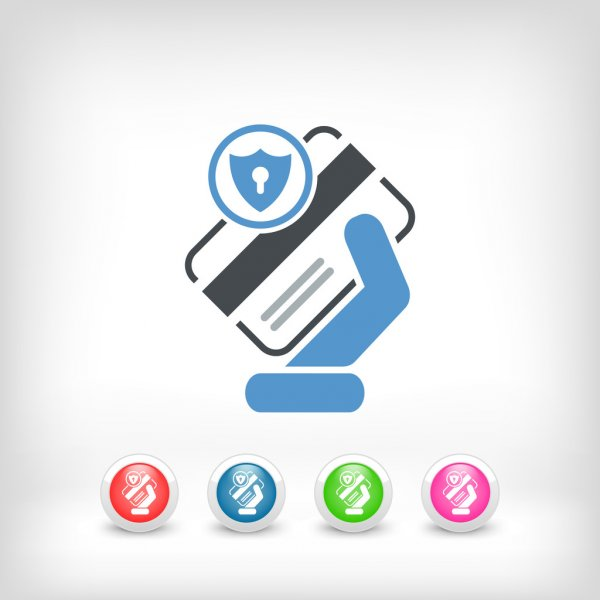

In [32]:
import requests
import IPython.display as Disp
#url = 'https://www.smithhanley.com/wp-content/uploads/2018/06/credit-risk.jpg'
url = 'https://st.depositphotos.com/1012074/4132/v/450/depositphotos_41322279-stock-illustration-credit-card-security.jpg'

Disp.Image(requests.get(url).content, width=300, height=300)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Functions-&amp;-Load-Data" data-toc-modified-id="Functions-&amp;-Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions &amp; Load Data</a></span></li><li><span><a href="#Initial-EDA" data-toc-modified-id="Initial-EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Initial EDA</a></span></li><li><span><a href="#Setting-Train-and-Test" data-toc-modified-id="Setting-Train-and-Test-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Setting Train and Test</a></span></li><li><span><a href="#Train-and-Test---Feature-Set" data-toc-modified-id="Train-and-Test---Feature-Set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train and Test - Feature Set</a></span></li><li><span><a href="#Model---Neural-Net" data-toc-modified-id="Model---Neural-Net-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model - Neural Net</a></span></li><li><span><a href="#Model---Lightgbm" data-toc-modified-id="Model---Lightgbm-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model - Lightgbm</a></span></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Metrics</a></span></li><li><span><a href="#Rank-Order" data-toc-modified-id="Rank-Order-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Rank Order</a></span></li><li><span><a href="#Review-Output" data-toc-modified-id="Review-Output-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Review Output</a></span></li><li><span><a href="#Plots-and-Visualizations" data-toc-modified-id="Plots-and-Visualizations-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Plots and Visualizations</a></span></li><li><span><a href="#Shapley-Feature-Importance" data-toc-modified-id="Shapley-Feature-Importance-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Shapley Feature Importance</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Feature Importance</a></span></li></ul></div>

# HOME CREDIT ANALYSIS 

The intention of this analysis is to grasp the programatic process of analyzing publicly available credit data. We will proceed with basic eda and preprocessing of the data.

The models that we have decided to use will be drastically different so that we can gain insight into how they perform with this given dataset. The models include Light Gradient Boosting Machine and an artificial neural network. 

The performance metrics that we have chosen to use are primarily the Area under the ROC (AUR), the Gini, and the KS statistic. Also included are each of the rank order charts produced by each model. 
Lastly, there is a set of overall visualizations per each model output so that we can visualize the output metrics.

## Imports

In [1]:
# IMPORT MAIN LIBRARIES
# Main Deps/libs
import numpy as np
import pandas as pd
from IPython.display import display as disp
from pandas import DataFrame as dfm
from collections import OrderedDict

# Misc
import functools as ft
import datetime as dt
import warnings
import sys
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

When processing data through python and jupyter, we have the ability to customize our plotting output. We also need to import the correct library dependencies. 
We have done this below, where the only the color scale is visible.

None


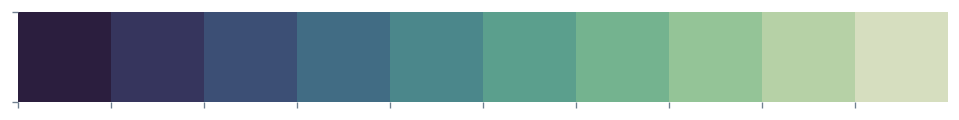

In [1]:
# VIZUALIZATION SETTINGS
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
# Set Graphing colors
color11 = (0.30, 0.30, 0.50, 0.80)
color12 = (0.30, 0.16, 0.57, 0.80)
color13 = (0.53, 0.17, 0.64, 0.80)
color14 = (0.75, 0.21, 0.62, 0.80)
color15 = (0.92, 0.31, 0.53, 0.80)
color16 = (0.98, 0.47, 0.46, 0.80)
color17 = (0.96, 0.66, 0.48, 0.80)
color18 = (0.93, 0.85, 0.64, 0.80)

# setting the color set
colorset3 = sns.cubehelix_palette(3,
                                   start=0.5,
                                   rot=-.75,
                                   dark=0.30,
                                   light=.75,
                                   reverse=True)

colorset10 = sns.cubehelix_palette(10,
                                   start=0.5,
                                   rot=-.75,
                                   dark=0.15,
                                   light=.85,
                                   reverse=True)

colorset25 = sns.cubehelix_palette(25,
                                   start=0.5,
                                   rot=-.75,
                                   dark=0.15,
                                   light=.85,
                                   reverse=True)

# color map
colormap = sns.cubehelix_palette(8,
                                 start=0.5,
                                 rot=-.75,
                                 dark=0.15,
                                 light=.85,
                                 reverse=True,
                                 as_cmap=True)


# plt.style.use(u'fast')
# plt.style.use(u'ggplot')

# matplotlib https://python-graph-gallery.com/199-matplotlib-style-sheets/
# plt.rcParams.keys()
rcVizParams = {
    # setting label sizes
    'legend.fontsize': 12,
    'figure.figsize': (12, 6),
    'axes.labelsize': 15,
    'axes.titlesize': 18,
    'figure.titleweight': 'bold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.dpi': 120,
    # setting colors
    'text.color': 'slategrey',
    'axes.labelcolor': 'slategrey',
    'xtick.color': 'slategrey',
    'ytick.color': 'slategrey',
    #'font.family': 'Helvetica',
    "lines.linewidth": 1
}
mpl.rcParams.update(rcVizParams)


mpl.rc(
    'axes',
    facecolor='#f2f4f7',
    edgecolor='none'
)
mpl.rc('grid', color='w', linestyle='solid')

#colorset1 = sns.color_palette('BuPu_r', 6, 1.0)
print(sns.palplot(colorset10))
#print(plt.style.available)
sns.set_palette(colorset10)

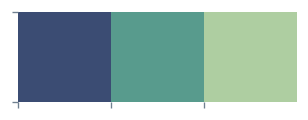

In [344]:
sns.palplot(colorset3)

In [84]:
# Setting additional Colors

color1 = 0.17250549177124488, 0.11951843162770595, 0.24320155229883056
color2 = 0.23607359470828057, 0.3125354171874312, 0.4605854787435648
color3 = 0.2958858732022419, 0.532095403269888, 0.5458447574597934
color4 = 0.4576142801317438, 0.7057950454122253, 0.5634791991994519
color5 = 0.7161563289278935, 0.8232880086631527, 0.6542005475652726
color6 =  0.8423298817793848, 0.8737404427964184, 0.7524954030731037

colorlist = [color1, color2, color3, color4, color5, color6]
#for i in colorlist:
    #display(sns.palplot(i))
    

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.sequence import pad_sequences

#from tensorflow.keras.models import Sequential
from keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, SpatialDropout1D, LSTM
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D, LSTM
#from tensorflow.keras.layers import Bidirectional
from keras.layers.wrappers import Bidirectional
#from tensorflow.keras.layers import Conv1D, MaxPooling1D # new! 
from keras.layers import Conv2D, Conv1D, MaxPooling1D, Input, Activation, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import os, json
import numpy as np
from sklearn.metrics import roc_auc_score 
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [7]:
import gc
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, merge, Reshape, Dropout, Input, Flatten, Concatenate #Merge
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("data2/"))

path = 'data2/'
# Any results you write to the current directory are saved as output.

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'home-credit-default-risk.zip', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


## Functions & Load Data

Below, we are loading in specific functions for this analysis.

We are also reviewing the top 5 rows of the training and testing data so that we can review them accordingly. There appears to be 191 attributes, including the target variable, which is indicative of default or not. (1=Yes, 0=No).

In [8]:
def display_roc_curve(y_, oof_preds_, folds_idx_):
    # Plot ROC curves
    plt.figure(figsize=(6,6))
    scores = [] 
    for n_fold, (_, val_idx) in enumerate(folds_idx_):  
        # Plot the roc curve
        fpr, tpr, thresholds = roc_curve(y_.iloc[val_idx], oof_preds_[val_idx])
        score = roc_auc_score(y_.iloc[val_idx], oof_preds_[val_idx])
        scores.append(score)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (n_fold + 1, score))
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)
    fpr, tpr, thresholds = roc_curve(y_, oof_preds_)
    score = roc_auc_score(y_, oof_preds_)
    plt.plot(fpr, tpr, color='b',
             label='Avg ROC (AUC = %0.4f $\pm$ %0.4f)' % (score, np.std(scores)),
             lw=2, alpha=.8)
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Embedding Neural Network ROC Curve')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

In [9]:
def display_precision_recall(y_, oof_preds_, folds_idx_):
    # Plot ROC curves
    plt.figure(figsize=(6,6))
    
    scores = [] 
    for n_fold, (_, val_idx) in enumerate(folds_idx_):  
        # Plot the roc curve
        fpr, tpr, thresholds = roc_curve(y_.iloc[val_idx], oof_preds_[val_idx])
        score = average_precision_score(y_.iloc[val_idx], oof_preds_[val_idx])
        scores.append(score)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='AP fold %d (AUC = %0.4f)' % (n_fold + 1, score))
    
    precision, recall, thresholds = precision_recall_curve(y_, oof_preds_)
    score = average_precision_score(y_, oof_preds_)
    plt.plot(precision, recall, color='b',
             label='Avg ROC (AUC = %0.4f $\pm$ %0.4f)' % (score, np.std(scores)),
             lw=2, alpha=.8)
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Embedding Neural Network Recall / Precision')
    plt.legend(loc="best")
    plt.tight_layout()
    
    plt.show()

In [10]:
def preprocessing(input_dir, debug=False):
    # No target encoding
    num_rows = 10000 if debug else None
    #--------
    print('Preprocessing started.')
    print('Bureau_Balance')
    buro_bal = pd.read_csv(input_dir + 'bureau_balance.csv', nrows=num_rows)
    
    buro_counts = buro_bal[['SK_ID_BUREAU', 'MONTHS_BALANCE']].groupby('SK_ID_BUREAU').count()
    buro_bal['buro_count'] = buro_bal['SK_ID_BUREAU'].map(buro_counts['MONTHS_BALANCE'])
    
    avg_buro_bal = buro_bal.groupby('SK_ID_BUREAU').mean()
    
    avg_buro_bal.columns = ['avg_buro_' + f_ for f_ in avg_buro_bal.columns]
    del buro_bal
    gc.collect()
    #--------
    print('Bureau')
    buro_full = pd.read_csv(input_dir + 'bureau.csv', nrows=num_rows)

    gc.collect()
    
    buro_full = buro_full.merge(right=avg_buro_bal.reset_index(), how='left', on='SK_ID_BUREAU', suffixes=('', '_bur_bal'))
    
    nb_bureau_per_curr = buro_full[['SK_ID_CURR', 'SK_ID_BUREAU']].groupby('SK_ID_CURR').count()
    buro_full['SK_ID_BUREAU'] = buro_full['SK_ID_CURR'].map(nb_bureau_per_curr['SK_ID_BUREAU'])
    
    avg_buro = buro_full.groupby('SK_ID_CURR').mean()
    
    del buro_full
    gc.collect()
    #--------
    print('Previous_Application')
    prev = pd.read_csv(input_dir + 'previous_application.csv', nrows=num_rows)
    
    prev_cat_features = [
        f_ for f_ in prev.columns if prev[f_].dtype == 'object'
    ]
    
    
    nb_prev_per_curr = prev[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
    prev['SK_ID_PREV'] = prev['SK_ID_CURR'].map(nb_prev_per_curr['SK_ID_PREV'])
    
    avg_prev = prev.groupby('SK_ID_CURR').mean()
    del prev
    gc.collect()
    #--------
    print('POS_CASH_Balance')
    pos = pd.read_csv(input_dir + 'POS_CASH_balance.csv', nrows=num_rows)
    
    nb_prevs = pos[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
    pos['SK_ID_PREV'] = pos['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])
    
    avg_pos = pos.groupby('SK_ID_CURR').mean()
    
    del pos, nb_prevs
    gc.collect()
    #--------
    print('Credit_Card_Balance')
    cc_bal = pd.read_csv(input_dir + 'credit_card_balance.csv', nrows=num_rows)

    nb_prevs = cc_bal[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
    cc_bal['SK_ID_PREV'] = cc_bal['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])
    
    avg_cc_bal = cc_bal.groupby('SK_ID_CURR').mean()
    avg_cc_bal.columns = ['cc_bal_' + f_ for f_ in avg_cc_bal.columns]
    
    del cc_bal, nb_prevs
    gc.collect()
    #--------
    print('Installments_Payments')
    inst = pd.read_csv(input_dir + 'installments_payments.csv', nrows=num_rows)
    nb_prevs = inst[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
    inst['SK_ID_PREV'] = inst['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])
    
    avg_inst = inst.groupby('SK_ID_CURR').mean()
    avg_inst.columns = ['inst_' + f_ for f_ in avg_inst.columns]
    #--------
    print('Train/Test')
    data = pd.read_csv(input_dir + 'application_train.csv', nrows=num_rows)
    test = pd.read_csv(input_dir + 'application_test.csv', nrows=num_rows)
    print('Shapes : ', data.shape, test.shape)
        
    data = data.merge(right=avg_buro.reset_index(), how='left', on='SK_ID_CURR')
    test = test.merge(right=avg_buro.reset_index(), how='left', on='SK_ID_CURR')
    
    data = data.merge(right=avg_prev.reset_index(), how='left', on='SK_ID_CURR')
    test = test.merge(right=avg_prev.reset_index(), how='left', on='SK_ID_CURR')
    
    data = data.merge(right=avg_pos.reset_index(), how='left', on='SK_ID_CURR')
    test = test.merge(right=avg_pos.reset_index(), how='left', on='SK_ID_CURR')
    
    data = data.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')
    test = test.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')
    
    data = data.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')
    test = test.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')
    
    del avg_buro, avg_prev
    gc.collect()
    
    print('Preprocessing done.')

    return data, test

In [11]:
trainingdf, testingdf = preprocessing('data2/', debug=False)

Preprocessing started.
Bureau_Balance
Bureau
Previous_Application
POS_CASH_Balance
Credit_Card_Balance
Installments_Payments
Train/Test
Shapes :  (307511, 122) (48744, 121)
Preprocessing done.


In [12]:
trainingdf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,cc_bal_CNT_INSTALMENT_MATURE_CUM,cc_bal_SK_DPD,cc_bal_SK_DPD_DEF,inst_SK_ID_PREV,inst_NUM_INSTALMENT_VERSION,inst_NUM_INSTALMENT_NUMBER,inst_DAYS_INSTALMENT,inst_DAYS_ENTRY_PAYMENT,inst_AMT_INSTALMENT,inst_AMT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,19.0,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,25.0,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,3.0,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,16.0,1.125000,4.437500,-252.250000,-271.625000,62947.088438,62947.088438
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,66.0,1.166667,7.045455,-1028.606061,-1032.242424,12666.444545,12214.060227


In [13]:
testingdf.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,cc_bal_CNT_INSTALMENT_MATURE_CUM,cc_bal_SK_DPD,cc_bal_SK_DPD_DEF,inst_SK_ID_PREV,inst_NUM_INSTALMENT_VERSION,inst_NUM_INSTALMENT_NUMBER,inst_DAYS_INSTALMENT,inst_DAYS_ENTRY_PAYMENT,inst_AMT_INSTALMENT,inst_AMT_PAYMENT
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,NaN,NaN,NaN,7.0,1.142857,2.714286,-2187.714286,-2195.000000,5885.132143,5885.132143
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,NaN,NaN,NaN,9.0,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,18.719101,0.010417,0.010417,155.0,0.277419,43.729032,-1352.929032,-1358.109677,10897.898516,9740.235774
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,19.547619,0.000000,0.000000,113.0,0.460177,30.504425,-855.548673,-858.548673,4979.282257,4356.731549
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,12.0,1.000000,6.500000,-622.000000,-634.250000,11100.337500,11100.337500


## Initial EDA

Starting our EDA, we will review the sparcity of the data as well as any superficial information that we can gain without going too deep into the analysis processs. 

Looking at the distribution of credit amount below, we see initially notice that the data is right skewed, where most of the observations would have credit limits below 1,000,000.

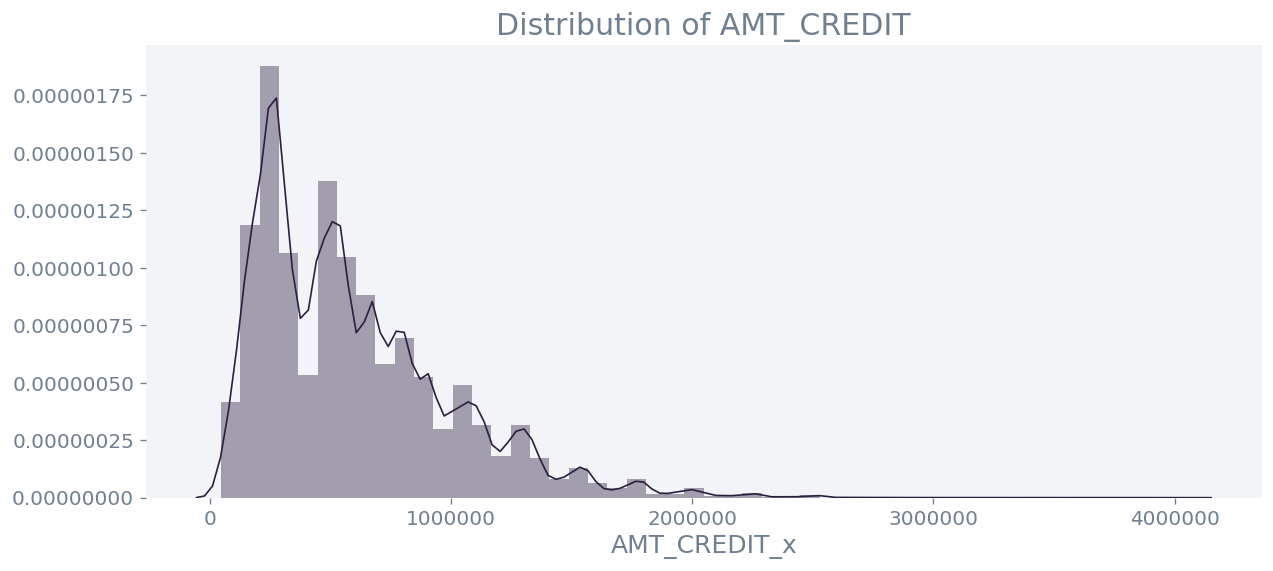

In [252]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(trainingdf["AMT_CREDIT_x"])

Target variable:
    Below we can see that ~92% of observations do not show default, while only ~8% do. This almost aligns with the national average which is about 10%. 
    It also means that the dataset is imbalanced, where our negative class is 11.5 times larger, carrying more predictive weight.

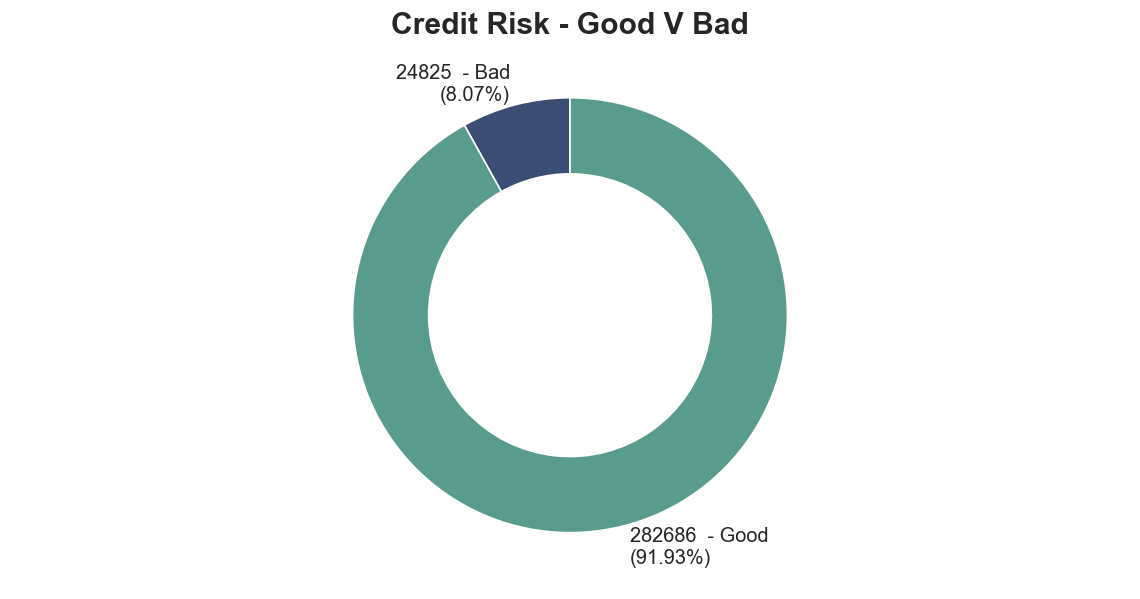

In [362]:
# Plotting
dfSet1 = trainingdf
labels = ' - Bad', ' - Good'
sizes = len(dfSet1[dfSet1['TARGET']==1]), len(dfSet1[dfSet1['TARGET']==0])
pcts = [f'{s} {l}\n({s*100/sum(sizes):.2f}%)' for s,l in zip(sizes, labels)]
width = 0.35

#sns.set_palette(colorset3)
_, ax = plt.subplots()
ax.axis('equal')

pie, _ = ax.pie(
    sizes,
    startangle=90,
    labels=pcts,
    #colors = [color4, color2],
    #colors = 'RdPu_r'
)

plt.title('Credit Risk - Good V Bad', weight='bold')
plt.setp(pie, width=width, edgecolor='white')
plt.show()

In [360]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_b_distribution_comp(var,nrow=2):
    i = 0
    t1 = trainingdf.loc[trainingdf['TARGET'] != 0]
    t0 = trainingdf.loc[trainingdf['TARGET'] == 0]
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,3*nrow))
    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.tight_layout()
    plt.show();

In [ ]:
Below, we can see that the bottom two graphs have high sparcity, where a large proportion of the data is ~zero.

<Figure size 1440x720 with 0 Axes>

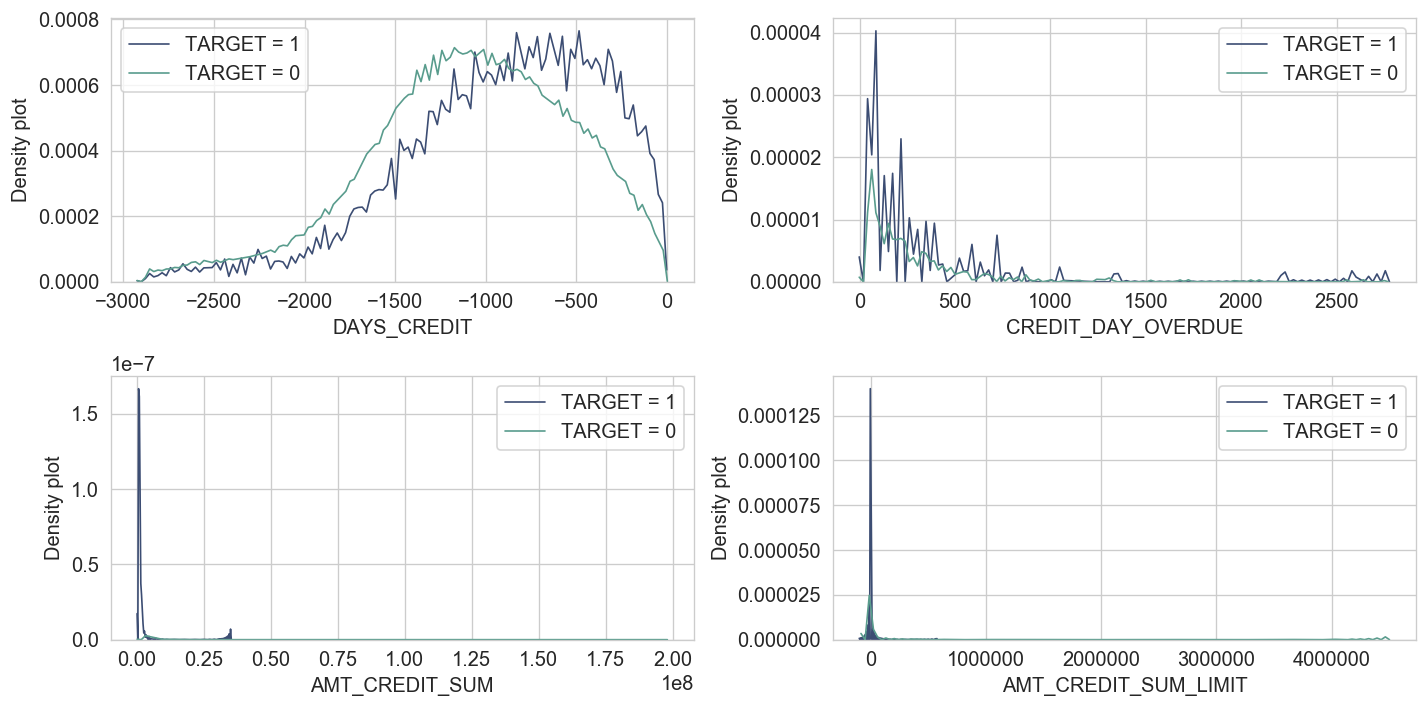

In [361]:
var = ['DAYS_CREDIT','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM','AMT_CREDIT_SUM_LIMIT']
#var = ['AMT_CREDIT_SUM','AMT_CREDIT_SUM_LIMIT']

plot_b_distribution_comp(var, nrow=2)

In [ ]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_b_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = trainingdf.loc[trainingdf['TARGET'] != 0]
    t0 = trainingdf.loc[trainingdf['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,3*nrow))
    
    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.tight_layout()
    plt.show();

<Figure size 1440x720 with 0 Axes>

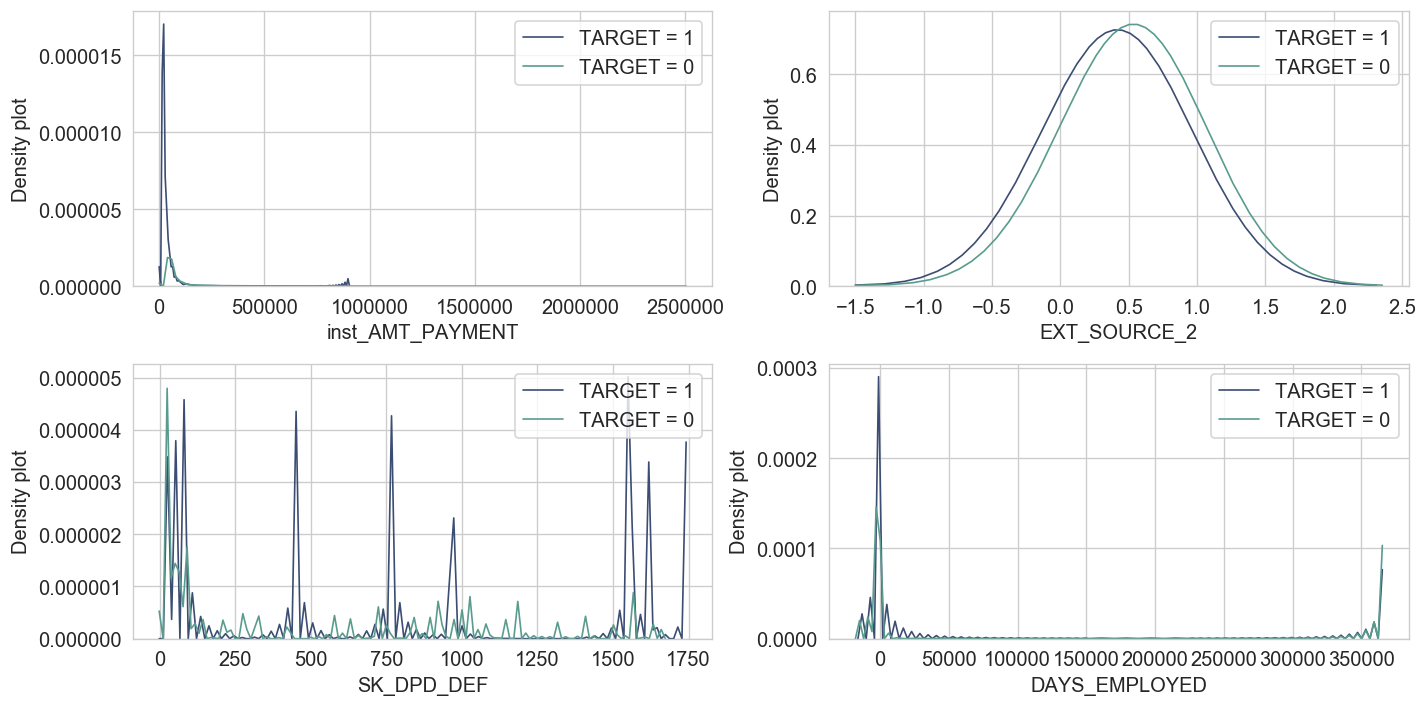

In [376]:
var = ['inst_AMT_PAYMENT','EXT_SOURCE_2','SK_DPD_DEF','DAYS_EMPLOYED']
#var = ['AMT_CREDIT_SUM','AMT_CREDIT_SUM_LIMIT']

plot_b_distribution_comp(var, nrow=2)

In [ ]:
In the below three pie charts, we can see that most of the loans are cash loans over revolving loans. We can also see that roughly 70% of loa

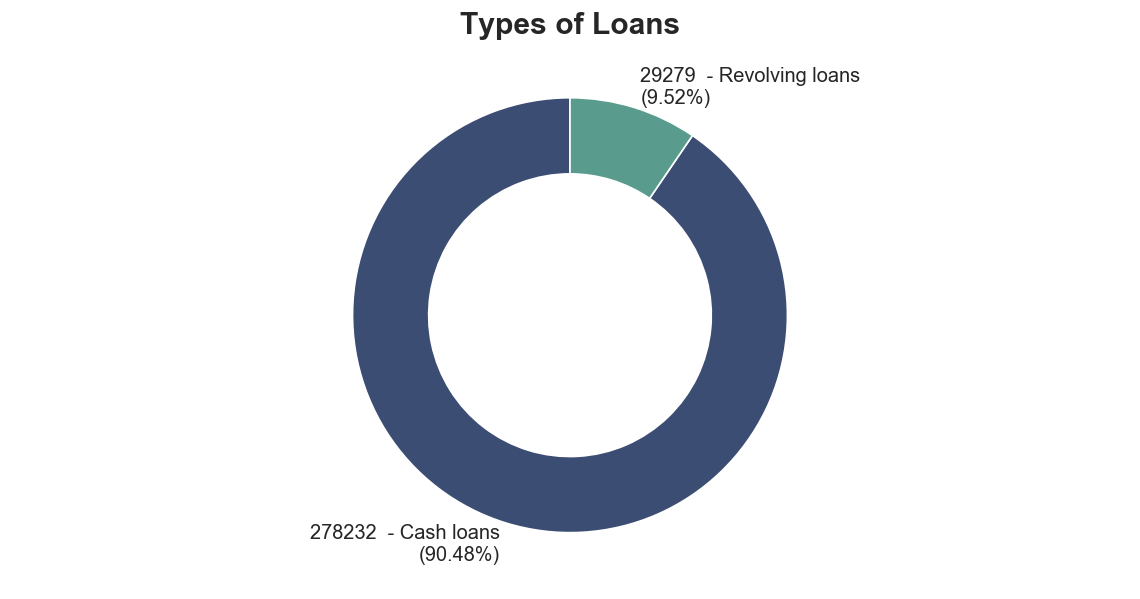

In [363]:
# Plotting
dfSet1 = trainingdf
labels = ' - Cash loans', ' - Revolving loans'
sizes = len(dfSet1[dfSet1['NAME_CONTRACT_TYPE']=='Cash loans']), len(dfSet1[dfSet1['NAME_CONTRACT_TYPE']=='Revolving loans'])
pcts = [f'{s} {l}\n({s*100/sum(sizes):.2f}%)' for s,l in zip(sizes, labels)]
width = 0.35

#sns.set_palette('RdPu_r')
_, ax = plt.subplots()
ax.axis('equal')

pie, _ = ax.pie(
    sizes,
    startangle=90,
    labels=pcts,
    #colors = [color4, color2],
    #colors = 'RdPu_r'
)

plt.title('Types of Loans', weight='bold')
plt.setp(pie, width=width, edgecolor='white')
plt.show()

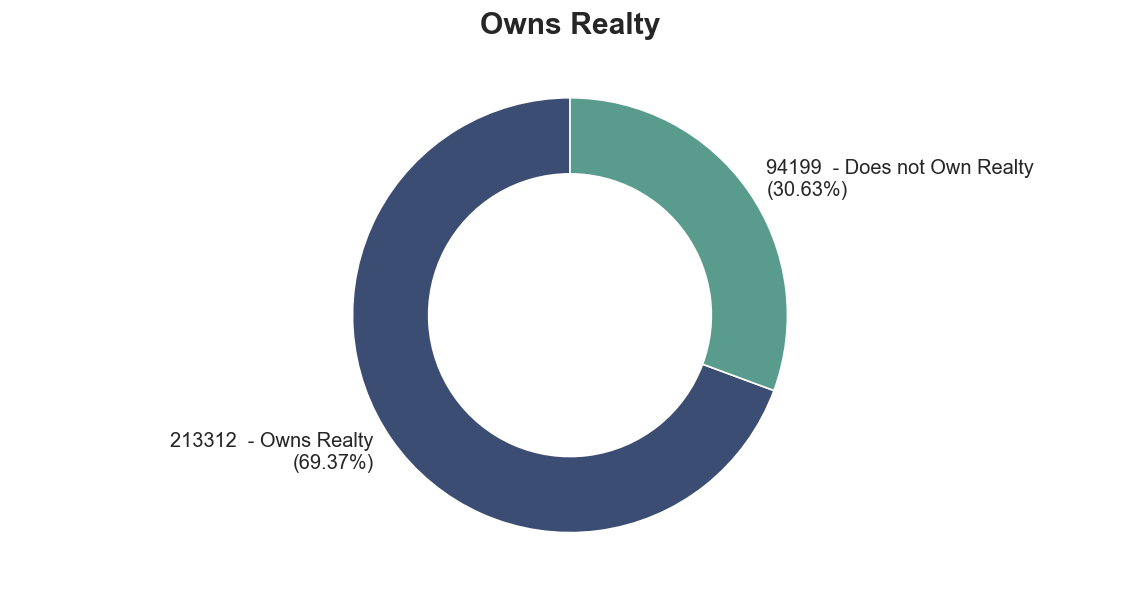

In [364]:
# Plotting
dfSet1 = trainingdf
labels = ' - Owns Realty', ' - Does not Own Realty'
sizes = len(dfSet1[dfSet1['FLAG_OWN_REALTY']=='Y']), len(dfSet1[dfSet1['FLAG_OWN_REALTY']=='N'])
pcts = [f'{s} {l}\n({s*100/sum(sizes):.2f}%)' for s,l in zip(sizes, labels)]
width = 0.35


_, ax = plt.subplots()
ax.axis('equal')

pie, _ = ax.pie(
    sizes,
    startangle=90,
    labels=pcts,
    #colors = [color4, color2],
    #colors = 'RdPu_r'
)

plt.title('Owns Realty', weight='bold')
plt.setp(pie, width=width, edgecolor='white')
plt.show()

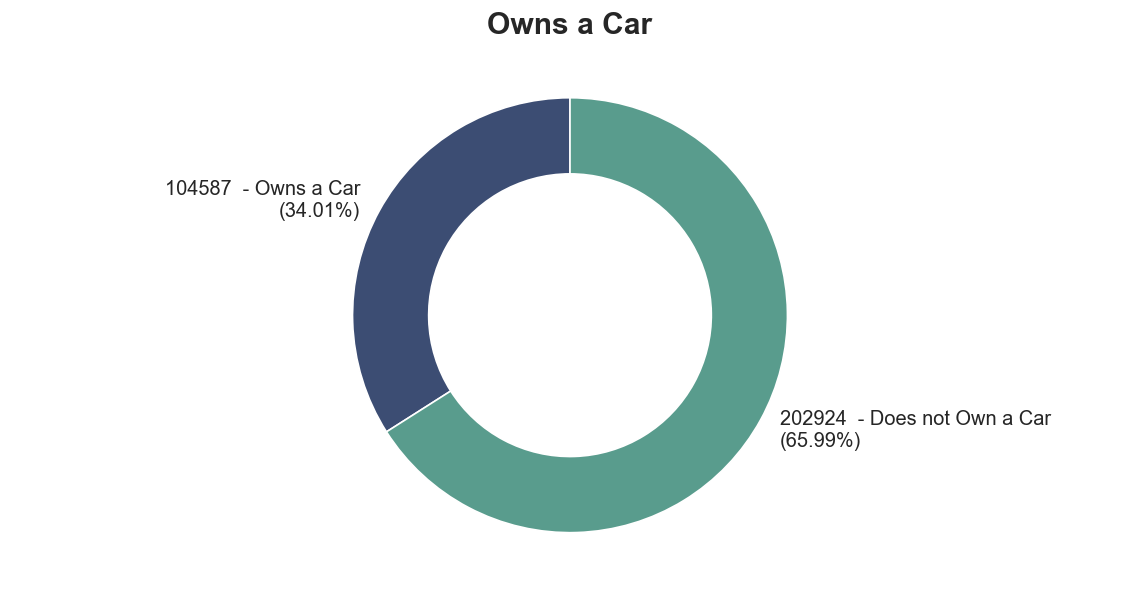

In [365]:
# Plotting
dfSet1 = trainingdf
labels = ' - Owns a Car', ' - Does not Own a Car'
sizes = len(dfSet1[dfSet1['FLAG_OWN_CAR']=='Y']), len(dfSet1[dfSet1['FLAG_OWN_CAR']=='N'])
pcts = [f'{s} {l}\n({s*100/sum(sizes):.2f}%)' for s,l in zip(sizes, labels)]
width = 0.35


_, ax = plt.subplots()
ax.axis('equal')

pie, _ = ax.pie(
    sizes,
    startangle=90,
    labels=pcts,
    #colors = [color4, color2],
    #colors = 'RdPu_r'
)

plt.title('Owns a Car', weight='bold')
plt.setp(pie, width=width, edgecolor='white')
plt.show()

## Setting Train and Test

Before running the data through the models, we first need to preprocess the data; this is particularly important for the nueral network. 

The preprocess steps that we undertake here include encoding of the categorical variables followed by embedding. 

In [15]:
from sklearn.model_selection import train_test_split
# Drop the target and the ID
X_train, y_train = trainingdf.iloc[:,2:], trainingdf['TARGET']


In [16]:
col_vals_dict = {c: list(X_train[c].unique()) for c in X_train.columns if X_train[c].dtype == object}

We can see that there are 16 categorical variables and 173 strictly numeric variables. 

In [17]:
nb_numeric   = len(X_train.columns) - len(col_vals_dict)
nb_categoric = len(col_vals_dict)
print('Number of Numerical features:', nb_numeric)
print('Number of Categorical features:', nb_categoric)

Number of Numerical features: 173
Number of Categorical features: 16


In [18]:
# Generator To Parse Cat
generator = (c for c in X_train.columns if X_train[c].dtype == object)

# Label Encoder
for c in generator:
    lbl = LabelEncoder()
    lbl.fit(list(X_train[c].values))  #+ list(X_test[c].values))
    X_train[c] = lbl.transform(list(X_train[c].values))

For simplicity, the categorical variables are listed below.

The unique values per attribute are also listed. We can see that some attributes like Organization type have 58 possible values/categories, while attributes like gender, education type, and house type only have between 3 and 5 values. 

In [19]:
# Setting Cat Embedding
embed_cols = []
len_embed_cols = []
for c in col_vals_dict:
    if len(col_vals_dict[c]) > 2:
        embed_cols.append(c)
        len_embed_cols.append(len(col_vals_dict[c]))
        print(c + ': %d values' % len(col_vals_dict[c])
              )  #look at value counts to know the embedding dimensions

print('\n Number of embeded features :', len(embed_cols))

CODE_GENDER: 3 values
NAME_TYPE_SUITE: 8 values
NAME_INCOME_TYPE: 8 values
NAME_EDUCATION_TYPE: 5 values
NAME_FAMILY_STATUS: 6 values
NAME_HOUSING_TYPE: 6 values
OCCUPATION_TYPE: 19 values
WEEKDAY_APPR_PROCESS_START: 7 values
ORGANIZATION_TYPE: 58 values
FONDKAPREMONT_MODE: 5 values
HOUSETYPE_MODE: 4 values
WALLSMATERIAL_MODE: 8 values
EMERGENCYSTATE_MODE: 3 values

 Number of embeded features : 13


We are using a 80/20 train and test split for this analysis. Because this is only an overview analysis, we will not be running a full pipeline with CV. The output for the train/test split can be seen below.

In [20]:
#X_test = test.iloc[:,1:]
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=10)

trainpercent = round((len(X_train)/ (len(X_train) + len(X_val))) * 100, 2)
testpercent = round((len(X_val)/ (len(X_train) + len(X_val))) * 100, 2)
print('\n Train: ', X_train.shape, len(X_train), trainpercent, '%'
      '\n Train: ', y_train.shape, len(y_train), trainpercent, '%'
      '\n Test: ', X_val.shape, len(X_val), testpercent, '%',
     '\n Test: ', y_val.shape, len(y_val), testpercent, '%',)

display(X_train.head(1), X_val.head(1), y_train.head(1), y_val.head(1))


 Train:  (246008, 189) 246008 80.0 %
 Train:  (246008,) 246008 80.0 %
 Test:  (61503, 189) 61503 20.0 % 
 Test:  (61503,) 61503 20.0 %


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,...,cc_bal_CNT_INSTALMENT_MATURE_CUM,cc_bal_SK_DPD,cc_bal_SK_DPD_DEF,inst_SK_ID_PREV,inst_NUM_INSTALMENT_VERSION,inst_NUM_INSTALMENT_NUMBER,inst_DAYS_INSTALMENT,inst_DAYS_ENTRY_PAYMENT,inst_AMT_INSTALMENT,inst_AMT_PAYMENT
110440,0,0,0,1,0,76500.0,441481.5,16771.5,364500.0,6,...,NaN,NaN,NaN,42.0,1.047619,8.52381,-607.047619,-645.02381,9708.5925,9708.5925


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,...,cc_bal_CNT_INSTALMENT_MATURE_CUM,cc_bal_SK_DPD,cc_bal_SK_DPD_DEF,inst_SK_ID_PREV,inst_NUM_INSTALMENT_VERSION,inst_NUM_INSTALMENT_NUMBER,inst_DAYS_INSTALMENT,inst_DAYS_ENTRY_PAYMENT,inst_AMT_INSTALMENT,inst_AMT_PAYMENT
179491,0,0,0,0,0,103500.0,625536.0,26631.0,540000.0,1,...,NaN,NaN,NaN,41.0,1.0,6.04878,-2475.365854,-2476.878049,7685.107683,6237.18439


110440    0
Name: TARGET, dtype: int64

179491    0
Name: TARGET, dtype: int64

In [21]:
def preproc2(X_train):

    input_list_train = []
    input_list_val = []
    #input_list_test = []
    
    #the cols to be embedded: rescaling to range [0, # values)
    for c in embed_cols:
        raw_vals = np.unique(X_train[c])
        val_map = {}
        for i in range(len(raw_vals)):
            val_map[raw_vals[i]] = i       
        input_list_train.append(X_train[c].map(val_map).values)
        #input_list_val.append(X_val[c].map(val_map).values)
        #input_list_test.append(X_test[c].map(val_map).fillna(0).values)
        
    #the rest of the columns
    other_cols = [c for c in X_train.columns if (not c in embed_cols)]
    input_list_train.append(X_train[other_cols].values)
    #input_list_val.append(X_val[other_cols].values)
    #input_list_test.append(X_test[other_cols].values)
    
    return input_list_train

In [22]:
proc_X_train_f = preproc2(X_train)
print('Length of the list:', len(proc_X_train_f))

Length of the list: 14


In [23]:
proc_X_val_f = preproc2(X_val)
print('Length of the list:', len(proc_X_train_f))

Length of the list: 14


In [24]:
print(proc_X_train_f[12].shape)

(246008,)


In [25]:
# Select the numeric features
num_cols = [x for x in X_train.columns if x not in embed_cols]

# Impute missing values in order to scale
X_train[num_cols] = X_train[num_cols].fillna(value = 0)
X_val[num_cols] = X_val[num_cols].fillna(value = 0)

# Fit the scaler only on train data
scaler = MinMaxScaler().fit(X_train[num_cols])
X_train.loc[:,num_cols] = scaler.transform(X_train[num_cols])
X_val.loc[:,num_cols] = scaler.transform(X_val[num_cols])

## Train and Test - Feature Set

This section is a rough duplicate of the above section, with one change. While the above train/test split uses the full set of attributes, the below data only encorporates the top 25 most important features as an output of the shapley values. These are list in the code below.

In [111]:
# Top 25 features as indicated by SHAP 
columnset2_topshap25 = [
    'EXT_SOURCE_2', 'SK_DPD_DEF', 'DAYS_EMPLOYED', 'EXT_SOURCE_1',
    'SK_ID_PREV_y', 'inst_AMT_PAYMENT', 'CODE_GENDER', 'CNT_PAYMENT',
    'DAYS_BIRTH', 'CNT_INSTALMENT_FUTURE', 'NAME_FAMILY_STATUS',
    'AMT_CREDIT_SUM_DEBT', 'DAYS_ID_PUBLISH', 'AMT_CREDIT_x', 'SK_ID_PREV_x',
    'NAME_EDUCATION_TYPE', 'NFLAG_INSURED_ON_APPROVAL', 'AMT_DOWN_PAYMENT',
    'SK_DPD', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_3',
    'AMT_GOODS_PRICE_x', 'AMT_ANNUITY_x', 'cc_bal_AMT_CREDIT_LIMIT_ACTUAL',
    'NAME_INCOME_TYPE'
]

#top25_shap_lgbm_list

In [169]:
from sklearn.model_selection import train_test_split
# Drop the target and the ID
X_train, y_train = trainingdf.loc[:,columnset2_topshap25], trainingdf['TARGET']


In [170]:
col_vals_dict = {c: list(X_train[c].unique()) for c in X_train.columns if X_train[c].dtype == object}

In [171]:
nb_numeric   = len(X_train.columns) - len(col_vals_dict)
nb_categoric = len(col_vals_dict)
print('Number of Numerical features:', nb_numeric)
print('Number of Categorical features:', nb_categoric)

Number of Numerical features: 21
Number of Categorical features: 4


In [172]:
# Generator to parse the cat
generator = (c for c in X_train.columns if X_train[c].dtype == object)

# Label Encoder
for c in generator:
    lbl = LabelEncoder()
    lbl.fit(list(X_train[c].values)) #+ list(X_test[c].values))
    X_train[c] = lbl.transform(list(X_train[c].values))
    #X_test[c] = lbl.transform(list(X_test[c].values))

In [173]:
embed_cols = []
len_embed_cols = []
for c in col_vals_dict:
    if len(col_vals_dict[c])>2:
        embed_cols.append(c)
        len_embed_cols.append(len(col_vals_dict[c]))
        print(c + ': %d values' % len(col_vals_dict[c])) #look at value counts to know the embedding dimensions
        
print('\n Number of embeded features :', len(embed_cols))

CODE_GENDER: 3 values
NAME_FAMILY_STATUS: 6 values
NAME_EDUCATION_TYPE: 5 values
NAME_INCOME_TYPE: 8 values

 Number of embeded features : 4


In [174]:
#X_test = test.iloc[:,1:]
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=10)

trainpercent = round((len(X_train)/ (len(X_train) + len(X_val))) * 100, 2)
testpercent = round((len(X_val)/ (len(X_train) + len(X_val))) * 100, 2)
print('\n x Train: ', X_train.shape, len(X_train), trainpercent, '%'
      '\n y Train: ', y_train.shape, len(y_train), trainpercent, '%'
      '\n x Test: ', X_val.shape, len(X_val), testpercent, '%',
     '\n y Test: ', y_val.shape, len(y_val), testpercent, '%',)

display(X_train.head(1), X_val.head(1), y_train.head(1), y_val.head(1))


 x Train:  (246008, 25) 246008 80.0 %
 y Train:  (246008,) 246008 80.0 %
 x Test:  (61503, 25) 61503 20.0 % 
 y Test:  (61503,) 61503 20.0 %


,EXT_SOURCE_2,SK_DPD_DEF,DAYS_EMPLOYED,EXT_SOURCE_1,SK_ID_PREV_y,inst_AMT_PAYMENT,CODE_GENDER,CNT_PAYMENT,DAYS_BIRTH,CNT_INSTALMENT_FUTURE,...,NAME_EDUCATION_TYPE,NFLAG_INSURED_ON_APPROVAL,AMT_DOWN_PAYMENT,SK_DPD,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_3,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,cc_bal_AMT_CREDIT_LIMIT_ACTUAL,NAME_INCOME_TYPE
110440,0.172563,0.0,365243,NaN,43.0,9708.5925,0,24.0,-22164,19.488372,...,4,0.666667,0.0,0.0,3,0.454321,364500.0,16771.5,NaN,3


,EXT_SOURCE_2,SK_DPD_DEF,DAYS_EMPLOYED,EXT_SOURCE_1,SK_ID_PREV_y,inst_AMT_PAYMENT,CODE_GENDER,CNT_PAYMENT,DAYS_BIRTH,CNT_INSTALMENT_FUTURE,...,NAME_EDUCATION_TYPE,NFLAG_INSURED_ON_APPROVAL,AMT_DOWN_PAYMENT,SK_DPD,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_3,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,cc_bal_AMT_CREDIT_LIMIT_ACTUAL,NAME_INCOME_TYPE
179491,0.694524,0.078947,-3844,NaN,38.0,6237.18439,0,9.5,-14921,4.710526,...,4,1.0,1226.705625,0.078947,1,0.479449,540000.0,26631.0,NaN,7


110440    0
Name: TARGET, dtype: int64

179491    0
Name: TARGET, dtype: int64

In [180]:
proc_X_train_f = preproc2(X_train)
print('Length of the list:', len(proc_X_train_f))

Length of the list: 5


In [181]:
proc_X_val_f = preproc2(X_val)
print('Length of the list:', len(proc_X_train_f))

Length of the list: 5


In [182]:
# Select the numeric features
num_cols = [x for x in X_train.columns if x not in embed_cols]

# Impute missing values in order to scale
X_train[num_cols] = X_train[num_cols].fillna(value = 0)
X_val[num_cols] = X_val[num_cols].fillna(value = 0)

# Fit the scaler only on train data
scaler = MinMaxScaler().fit(X_train[num_cols])
X_train.loc[:,num_cols] = scaler.transform(X_train[num_cols])
X_val.loc[:,num_cols] = scaler.transform(X_val[num_cols])

## Model - Neural Net

For the neural network structure we decided to use a four layer dense neural network with 'relu' activation. 

We are able to get achive a fairly close convergence of the train and test loss, different by approximately 0.003. The preliminary AUC for this test run is 73.5%. We also see that the model took roughly 1 minute to run.

In [283]:
def build_embedding_network2(len_embed_cols_func):
    
    model_out = []
    model_in  = []
    
    for dim in len_embed_cols_func:
        input_dim = Input(shape=(1,), dtype='int32')
        embed_dim = Embedding(dim, dim//2, input_length=1)(input_dim)
        embed_dim = Dropout(0.25)(embed_dim)
        embed_dim = Reshape((dim//2,))(embed_dim)
        model_out.append(embed_dim)
        model_in.append(input_dim)
    
    input_num = Input(shape=(21,), dtype='float32')
    outputs = Sequential()#([*model_out, input_num])
    outputs = Concatenate(axis=1)([*model_out, input_num])
    
    #outputs = Sequential()(outputs) 
    outputs = (Dense(512))(outputs) 
    outputs = (Activation('relu'))(outputs)
    outputs = (Dropout(.35))(outputs)
    
    outputs = (Dense(256))(outputs)
    outputs = (Activation('relu'))(outputs)
    outputs = (Dropout(.15))(outputs)
    
    outputs = (Dense(128))(outputs) 
    outputs = (Activation('relu'))(outputs)
    outputs = (Dropout(.15))(outputs)
    
    outputs = (Dense(1))(outputs)
    outputs = (Activation('sigmoid'))(outputs)
    
    model = Model([*model_in, input_num], outputs)
    
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    return model

In [284]:
# Train the network - 2
folds = 2
runs_per_fold = 1
n_epochs = 5
patience = 10

cv_train_aucs   = []
cv_test_aucs   = []

y_pred_prob_train_nn = np.zeros(np.shape(X_train)[0])
y_pred_prob_test_nn = np.zeros(np.shape(X_val)[0])
y_train_preds_nn = np.zeros((np.shape(X_train)[0],folds))
y_test_preds_nn = np.zeros((np.shape(X_val)[0],folds))

kfold = StratifiedKFold(n_splits = folds,  
                            shuffle = True, random_state=1)
# FITTING THE MODEL
import time
## Set time and run model fit
toc = time.time()
for i, (f_ind, outf_ind) in enumerate(kfold.split(X_train, y_train)):

    X_train_f = X_train
    ##X_val_f   = X_train.loc[outf_ind].copy()
    X_val_f   = X_val.copy()

    y_train_f = y_train
    ##y_val_f   = y_train[outf_ind]
    y_val_f   = y_val

    # Shuffle data
    #idx = np.arange(len(X_train_f))
    #np.random.shuffle(idx)
    X_train_f = X_train_f#.iloc[idx]
    y_train_f = y_train_f#.iloc[idx]

    #preprocessing
    #proc_X_train_f, proc_X_val_f, proc_X_test_f = preproc(X_train_f, X_val_f, X_test_f)
    proc_X_train_f = preproc2(X_train)
    proc_X_val_f = preproc2(X_val)

    
    #track oof prediction for cv scores
    y_train_preds_nn = 0
    y_test_preds_nn = 0
    
    for j in range(runs_per_fold):
    
        model_nn = build_embedding_network2(len_embed_cols)

        # Set callback functions to early stop training and save the best model so far
        callbacks = [EarlyStopping(monitor='val_loss', patience=patience)]

        history_nn = model_nn.fit(proc_X_train_f,
                                  y_train_f.values,
                                  epochs=n_epochs,
                                  batch_size=4096,
                                  verbose=1,
                                  callbacks=callbacks,
                                  validation_data=(proc_X_val_f, y_val_f))
        
        
        y_train_preds_nn += model_nn.predict(proc_X_train_f)[:,0] / runs_per_fold
        y_test_preds_nn += model_nn.predict(proc_X_val_f)[:,0] / runs_per_fold
        #y_test_preds_nn += model_nn.predict(proc_X_val_f)/ runs_per_fold


    
    y_pred_prob_train_nn += y_train_preds_nn
    y_pred_prob_test_nn += y_test_preds_nn
    #y_pred_prob_test_nn2 += y_test_preds_nn.argmax(axis=-1)
    
    cv_train_auc  = roc_auc_score(y_train_f.values, y_train_preds_nn)
    cv_test_auc  = roc_auc_score(y_val_f.values, y_test_preds_nn)
    
    cv_train_aucs.append(cv_train_auc)
    cv_test_aucs.append(cv_test_auc)

## End - Calc time and print wanted results
tic = time.time()
model_runtime = round((tic - toc) * 1 / 60, 2)
print("Model Time  :   {} Min".format(model_runtime))

Train on 246008 samples, validate on 61503 samples
Epoch 1/5
246008/246008 [==============================] - 5s 20us/step - loss: 0.2930 - val_loss: 0.2600
Epoch 2/5
246008/246008 [==============================] - 4s 15us/step - loss: 0.2595 - val_loss: 0.2570
Epoch 3/5
246008/246008 [==============================] - 4s 15us/step - loss: 0.2564 - val_loss: 0.2553
Epoch 4/5
246008/246008 [==============================] - 4s 15us/step - loss: 0.2549 - val_loss: 0.2538
Epoch 5/5
246008/246008 [==============================] - 4s 15us/step - loss: 0.2543 - val_loss: 0.2533
Train on 246008 samples, validate on 61503 samples
Epoch 1/5
246008/246008 [==============================] - 5s 20us/step - loss: 0.2916 - val_loss: 0.2601
Epoch 2/5
246008/246008 [==============================] - 4s 15us/step - loss: 0.2589 - val_loss: 0.2565
Epoch 3/5
246008/246008 [==============================] - 4s 14us/step - loss: 0.2560 - val_loss: 0.2556
Epoch 4/5
246008/246008 [=========================

In [285]:
print('Mean out of fold Train AUC: %.5f' % np.mean(cv_train_auc))
print('Mean out of fold Test AUC: %.5f' % np.mean(cv_test_auc))
print('Full validation Train AUC: %.5f' % roc_auc_score(y_train.values, y_pred_prob_train_nn))
print('Full validation Test AUC: %.5f' % roc_auc_score(y_val.values, y_pred_prob_test_nn))

Mean out of fold Train AUC: 0.74530
Mean out of fold Test AUC: 0.73562
Full validation Train AUC: 0.74511
Full validation Test AUC: 0.73583


## Model - Lightgbm

Below we program the lightGBM model. This model runs very fast, taking only 0.18 mins. 

The results are better than the nueral network by roughly 3% with an AUC of about 76.1%.

In [225]:
import lightgbm as lgb
#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 1000 define only the absolute maximum
model_classifier_lgbm = lgb.LGBMClassifier(num_leaves=15,
                                           max_depth=-1,
                                           boosting_type='gbdt',
                                           random_state=314,
                                           silent=True,
                                           metric='None',
                                           n_jobs=4,
                                           n_estimators=1000,
                                           subsample=0.9,
                                           learning_rate=0.07,
                                           #objective='binary',
                                           subsample_for_bin=200,
                                           subsample_freq=1,
                                           colsample_bytree=0.64,
                                           reg_alpha=1.2,
                                           reg_lambda=1.2,
                                           min_split_gain=0.5,
                                           min_child_weight=1,
                                           min_child_samples=5,
                                           scale_pos_weight=1)

In [226]:
fit_params={"early_stopping_rounds":10, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_val,y_val)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }

In [227]:
# FITTING THE MODEL
import time
## Set time and run model fit
toc = time.time()
model_fitted_lgbm = model_classifier_lgbm.fit(X_train, y_train, **fit_params)
## collecting the model name
model_name = (model_fitted_lgbm.__class__.__name__)

# Setting the predictions and prediction probabilities
y_pred_train_lgbm = model_fitted_lgbm.predict(X_train)
y_pred_test_lgbm  = model_fitted_lgbm.predict(X_val)
y_pred_prob_train_lgbm = model_fitted_lgbm.predict_proba(X_train)[:, 1]
y_pred_prob_test_lgbm = model_fitted_lgbm.predict_proba(X_val)[:, 1]

## End - Calc time and print wanted results
tic = time.time()
model_runtime = round((tic - toc) * 1 / 60, 2)
print("Model Time  :   {} Min".format(model_runtime))

Training until validation scores don't improve for 10 rounds
[100]	valid's auc: 0.754034
[200]	valid's auc: 0.759953
[300]	valid's auc: 0.76142
Early stopping, best iteration is:
[291]	valid's auc: 0.761466
Model Time  :   0.18 Min


## Metrics

Before moving onto the main metric visualizations, we print out the metrics below. The first set of metrics is for the train and test data on the neural network while the second set is for the LightGBM model. 

In [219]:
# SET FUNCTION - ALL MODEL METRICS
from scipy.stats import ks_2samp
def calc_gini_auc_ks(df_actuals, df_probs, train_test):

    #if model_bench.lower() == 'model':
    if train_test == 'train':
        print('TRAIN MODEL:')
        y_pred = df_probs
        #print(y_pred)
        y_true = df_actuals
        #print(y_true)
        # KS - SPECIFIC
        y_train_df = pd.DataFrame(df_actuals)
        y_train_df.reset_index(drop=True, inplace=True)
        dataframe_merge = pd.DataFrame(y_pred,
                                       columns=['Score'])
        dataframe_merge = pd.merge(y_train_df,
                                   dataframe_merge,
                                   left_index=True,
                                   right_index=True)
        KS_out = ks_2samp(
            dataframe_merge.loc[dataframe_merge['TARGET'] == 1, 'Score'],
            dataframe_merge.loc[dataframe_merge['TARGET'] ==
                                0, 'Score'])[0]

    if train_test == 'test':
        print('TEST MODEL:')
        y_pred = df_probs
        y_true = df_actuals

        # KS - SPECIFIC
        y_test_df = pd.DataFrame(df_actuals)
        y_test_df.reset_index(drop=True, inplace=True)
        dataframe_merge = pd.DataFrame(y_pred,
                                       columns=['Score'])
        dataframe_merge = pd.merge(y_test_df,
                                   dataframe_merge,
                                   left_index=True,
                                   right_index=True)

        KS_out = ks_2samp(
            dataframe_merge.loc[dataframe_merge['TARGET'] == 1, 'Score'],
            dataframe_merge.loc[dataframe_merge['TARGET'] ==
                                0, 'Score'])[0]

    # SECTION II
    # check and get number of samples
    assert y_true.shape == y_pred.shape
    n_samples = y_true.shape[0]

    # sort rows on prediction column
    # (from largest to smallest)
    arr = np.array([y_true, y_pred]).transpose()
    true_order = arr[arr[:, 0].argsort()][::-1, 0]
    pred_order = arr[arr[:, 1].argsort()][::-1, 0]

    # Lorenz curves - Cumulative
    L_true = np.cumsum(true_order) / np.sum(true_order)
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)
    L_ones = np.linspace(1 / n_samples, 1, n_samples)

    # Gini coefficients (area between curves)
    G_true = np.sum(L_ones - L_true)
    G_pred = np.sum(L_ones - L_pred)

    # Normalize
    Gini = G_pred / G_true
    #Gini = round(Gini * 100, 2)
    AUC = (Gini + 1) / 2
    print('Gini: {:.4} | AUC: {:.4} | KS: {:.4}'.format(Gini, AUC, KS_out))
    return Gini, AUC, KS_out

In [228]:
# # RUN METRICS - MODEL TRAIN
# nn_train_gini, nn_train_auc, nn_train_ks = calc_gini_auc_ks(y_train, y_pred_prob_train_nn, 'train')
# # RUN METRICS - MODEL TRAIN
# nn_test_gini, nn_test_auc, nn_test_ks = calc_gini_auc_ks(y_val, y_pred_prob_test_nn, 'test')

In [229]:
# # RUN METRICS - MODEL TRAIN
# lgbm_train_gini, lgbm_train_auc, lgbm_train_ks = calc_gini_auc_ks(y_train, y_pred_prob_train_lgbm, 'train')
# # RUN METRICS - MODEL TRAIN
# lgbm_test_gini, lgbm_test_auc, lgbm_test_ks = calc_gini_auc_ks(y_val, y_pred_prob_test_lgbm, 'test')

###### NN Metrics:

In [222]:
# RUN METRICS - MODEL TRAIN
model_train_gini, model_train_auc, model_train_ks = calc_gini_auc_ks(y_train, y_pred_prob_train_nn, 'train')
# RUN METRICS - MODEL TRAIN
model_test_gini, model_test_auc, model_test_ks = calc_gini_auc_ks(y_val, y_pred_prob_test_nn, 'test')

TRAIN MODEL:
Gini: 0.5071 | AUC: 0.7536 | KS: 0.3784
TEST MODEL:
Gini: 0.4877 | AUC: 0.7439 | KS: 0.3743


###### Light Metrics:

In [230]:
# RUN METRICS - BENCHMARKS TRAIN - BK_benchmark
bk_bench_train_gini, bk_bench_train_auc, bk_bench_train_ks = calc_gini_auc_ks(y_train, y_pred_prob_train_lgbm, 'train')

# RUN METRICS - BENCHMARKS TEST - BK_benchmark
bk_bench_test_gini,  bk_bench_test_auc,  bk_bench_test_ks  = calc_gini_auc_ks(y_val, y_pred_prob_test_lgbm, 'test')

TRAIN MODEL:
Gini: 0.584 | AUC: 0.792 | KS: 0.4379
TEST MODEL:
Gini: 0.5229 | AUC: 0.7615 | KS: 0.3951


## Rank Order

In [38]:
# SET FUNCTION - RANK ORDERING  MODEL
def rank_order_model_and_bench(df_actuals, df_probs, train_or_test): #model_or_bench, train_or_test):
    """
    PURPOSE:
        1) Create RankOrdering tables for the model and the benchmark data.
        2) Generate a KS score
    Make sure that the train predication probabilities variable is set as: y_pred_prob_train
    Make sure that the train predictions probabilities variable is set as: y_pred_prob_test
    """
    ### SECTION I
    # SETTING IMPORTANT VARS
    rank_by = ['RANK']
    target = 'BAD'
    nontarget = 'GOOD'

    ### SECTION II 
    # DISCERN BETWEEN MODEL AND BENCHMARKS
    # conditional for benchmark train - test
#     if model_or_bench == 'model':
        # SETTING WHETHER WE NEED THE TRAIN OR TEST DATA
    if train_or_test.lower() == 'train':
        print('TRAINING MODEL DATA:')
        xfeature_train = X_train
        xfeature_train.reset_index(drop=True, inplace=True)
        features = xfeature_train
        #-BREAK-#
        ylabel_train = y_train
        ylabel_train.reset_index(drop=True, inplace=True)
        target_df = ylabel_train
        target_df.reset_index(drop=True, inplace=True)
        scoring_df = pd.DataFrame(df_probs, columns=['SCORE'])
        scoring_df['RANK'] = pd.qcut(scoring_df['SCORE'].rank(
            method='first', ascending=False),
                                     20,
                                     labels=range(20, 0, -1))

    if train_or_test.lower() == 'test':
        print('TESTING MODEL DATA:')
        ### setting variables to use for scoring and rank ordering
        xfeature_test = X_val
        xfeature_test.reset_index(drop=True, inplace=True)
        features = xfeature_test
        #-BREAK-#
        ylabel_test = y_val
        ylabel_test.reset_index(drop=True, inplace=True)
        target_df = ylabel_test
        target_df.reset_index(drop=True, inplace=True)
        scoring_df = pd.DataFrame(df_probs, columns=['SCORE'])

        scoring_df['RANK'] = pd.qcut(scoring_df['SCORE'].rank(
            method='first', ascending=False),
                                     20,
                                     labels=range(20, 0, -1))
            

    ### SECTION II
    scoring_df['RANK'] = scoring_df['RANK'].astype(int)
    #scoring_df['RANK_PCT'] = scoring_df['RANK'].astype(int)
    scoring_df['BAD'] = target_df
    scoring_df['GOOD'] = 1 - target_df

    ### SECTION III
    # CREATING THE RANK ORDER TABLES
    inputs = list(rank_by)
    inputs.extend((target, nontarget))
    ranking = scoring_df[inputs]
    grouped = ranking.groupby(rank_by)
    temp_df = pd.DataFrame({}, index=[])
    # Running bads
    temp_df['RANK_NUM'] = round(grouped.sum()[nontarget] + grouped.sum()[target], 0).astype(int)
    temp_df['BAD_NUM'] = grouped.sum()[target].astype(int)
    temp_df['BAD_NUM_CUM'] = grouped.sum()[target].cumsum().astype(int)
    temp_df['BAD_PCT_CUM'] = temp_df['BAD_NUM_CUM'] / temp_df['BAD_NUM'].sum() * 100
    temp_df['BAD_PCT_CUM'] = round(temp_df['BAD_PCT_CUM'], 2)
    temp_df['BAD_PCT_RANK'] = round(grouped.mean()[target] * 100, 2)
    # Running goods
    temp_df['GOOD_NUM'] = grouped.sum()[nontarget].astype(int)
    temp_df['GOOD_NUM_CUM'] = grouped.sum()[nontarget].cumsum().astype(int)
    temp_df['GOOD_PCT_RANK'] = round(grouped.mean()[nontarget] * 100, 2)
    temp_df['GOOD_PCT_CUM'] = temp_df['GOOD_NUM_CUM'] / temp_df['GOOD_NUM'].sum() * 100
    temp_df['GOOD_PCT_CUM'] = round(temp_df['GOOD_PCT_CUM'], 2)
    # Gains
    #temp_df['BAD_GAINS'] = 100 - temp_df["BAD_PCT_CUM"]
    #temp_df['BAD_GAINS'] = temp_df["BAD_GAINS"].values[::-1]

    # Binned KS
    temp_df['CUM_GB_KS'] = abs(temp_df['GOOD_PCT_CUM'] -
                               temp_df['BAD_PCT_CUM'])
    temp_df['CUM_GB_KS'] = round(temp_df['CUM_GB_KS'], 2)
    KS_MaxVal = temp_df['CUM_GB_KS'].max()
    temp_df['KS'] = np.where(temp_df['CUM_GB_KS'] == KS_MaxVal, "KS", "")
    # Correcting output
    temp_df = temp_df.reset_index()
    temp_df.set_index('RANK')
    temp_df.index = np.arange(1, len(temp_df) + 1)
    temp_df['RANK_PCT'] = 100 / len(temp_df['RANK'])
    temp_df['RANK_PCT'] = temp_df['RANK_PCT'].cumsum()
    #-BREAK-#
    # Moving columns around
    temp_df = pd.DataFrame(temp_df)
    move_rank_pct = temp_df.pop('RANK_PCT')
    temp_df.insert(1, 'RANK_PCT', move_rank_pct)
    temp_df.pop('RANK')
    return (temp_df)

In [231]:
rank_order_nn_train = rank_order_model_and_bench(y_train, y_pred_prob_train_nn, 'train')
rank_order_nn_train

TRAINING MODEL DATA:


,RANK_PCT,RANK_NUM,BAD_NUM,BAD_NUM_CUM,BAD_PCT_CUM,BAD_PCT_RANK,GOOD_NUM,GOOD_NUM_CUM,GOOD_PCT_RANK,GOOD_PCT_CUM,CUM_GB_KS,KS
1,5.0,12301,119,119,0.60,0.97,12182,12182,99.03,5.39,4.79,
2,10.0,12300,187,306,1.54,1.52,12113,24295,98.48,10.74,9.20,
3,15.0,12301,221,527,2.65,1.80,12080,36375,98.20,16.08,13.43,
4,20.0,12300,278,805,4.05,2.26,12022,48397,97.74,21.40,17.35,
5,25.0,12300,310,1115,5.61,2.52,11990,60387,97.48,26.70,21.09,
6,30.0,12301,403,1518,7.64,3.28,11898,72285,96.72,31.96,24.32,
7,35.0,12300,417,1935,9.74,3.39,11883,84168,96.61,37.22,27.48,
8,40.0,12300,516,2451,12.34,4.20,11784,95952,95.80,42.43,30.09,
9,45.0,12301,555,3006,15.14,4.51,11746,107698,95.49,47.62,32.48,
10,50.0,12300,607,3613,18.19,4.93,11693,119391,95.07,52.79,34.60,


In [232]:
rank_order_nn_test = rank_order_model_and_bench(y_val, y_pred_prob_test_nn, 'test')
rank_order_nn_test

TESTING MODEL DATA:


,RANK_PCT,RANK_NUM,BAD_NUM,BAD_NUM_CUM,BAD_PCT_CUM,BAD_PCT_RANK,GOOD_NUM,GOOD_NUM_CUM,GOOD_PCT_RANK,GOOD_PCT_CUM,CUM_GB_KS,KS
1,5.0,3076,49,49,0.99,1.59,3027,3027,98.41,5.35,4.36,
2,10.0,3075,55,104,2.09,1.79,3020,6047,98.21,10.70,8.61,
3,15.0,3075,56,160,3.22,1.82,3019,9066,98.18,16.04,12.82,
4,20.0,3075,84,244,4.91,2.73,2991,12057,97.27,21.33,16.42,
5,25.0,3075,81,325,6.55,2.63,2994,15051,97.37,26.62,20.07,
6,30.0,3075,103,428,8.62,3.35,2972,18023,96.65,31.88,23.26,
7,35.0,3075,105,533,10.74,3.41,2970,20993,96.59,37.13,26.39,
8,40.0,3075,121,654,13.17,3.93,2954,23947,96.07,42.36,29.19,
9,45.0,3075,146,800,16.11,4.75,2929,26876,95.25,47.54,31.43,
10,50.0,3075,161,961,19.36,5.24,2914,29790,94.76,52.69,33.33,


In [233]:
rank_order_lgbm_train = rank_order_model_and_bench(y_train, y_pred_prob_train_lgbm, 'train')
rank_order_lgbm_train

TRAINING MODEL DATA:


,RANK_PCT,RANK_NUM,BAD_NUM,BAD_NUM_CUM,BAD_PCT_CUM,BAD_PCT_RANK,GOOD_NUM,GOOD_NUM_CUM,GOOD_PCT_RANK,GOOD_PCT_CUM,CUM_GB_KS,KS
1,5.0,12301,75,75,0.38,0.61,12226,12226,99.39,5.41,5.03,
2,10.0,12300,95,170,0.86,0.77,12205,24431,99.23,10.80,9.94,
3,15.0,12301,177,347,1.75,1.44,12124,36555,98.56,16.16,14.41,
4,20.0,12300,207,554,2.79,1.68,12093,48648,98.32,21.51,18.72,
5,25.0,12300,221,775,3.90,1.80,12079,60727,98.20,26.85,22.95,
6,30.0,12301,286,1061,5.34,2.33,12015,72742,97.67,32.17,26.83,
7,35.0,12300,347,1408,7.09,2.82,11953,84695,97.18,37.45,30.36,
8,40.0,12300,361,1769,8.91,2.93,11939,96634,97.07,42.73,33.82,
9,45.0,12301,463,2232,11.24,3.76,11838,108472,96.24,47.97,36.73,
10,50.0,12300,513,2745,13.82,4.17,11787,120259,95.83,53.18,39.36,


In [234]:
rank_order_lgbm_test = rank_order_model_and_bench(y_val, y_pred_prob_test_lgbm, 'test')
rank_order_lgbm_test

TESTING MODEL DATA:


,RANK_PCT,RANK_NUM,BAD_NUM,BAD_NUM_CUM,BAD_PCT_CUM,BAD_PCT_RANK,GOOD_NUM,GOOD_NUM_CUM,GOOD_PCT_RANK,GOOD_PCT_CUM,CUM_GB_KS,KS
1,5.0,3076,34,34,0.68,1.11,3042,3042,98.89,5.38,4.70,
2,10.0,3075,56,90,1.81,1.82,3019,6061,98.18,10.72,8.91,
3,15.0,3075,57,147,2.96,1.85,3018,9079,98.15,16.06,13.10,
4,20.0,3075,64,211,4.25,2.08,3011,12090,97.92,21.38,17.13,
5,25.0,3075,74,285,5.74,2.41,3001,15091,97.59,26.69,20.95,
6,30.0,3075,83,368,7.41,2.70,2992,18083,97.30,31.98,24.57,
7,35.0,3075,100,468,9.43,3.25,2975,21058,96.75,37.25,27.82,
8,40.0,3075,116,584,11.76,3.77,2959,24017,96.23,42.48,30.72,
9,45.0,3075,117,701,14.12,3.80,2958,26975,96.20,47.71,33.59,
10,50.0,3075,163,864,17.40,5.30,2912,29887,94.70,52.86,35.46,


## Review Output

In [235]:
# CREATING PLOTTING DATAFRAMES FOR GAIN
#--------
# CURRENT MODEL DATA
plotting_model_train = pd.DataFrame(rank_order_nn_train)
plotting_model_train.loc[0] = 0
plotting_model_train['GAIN_CAP'] = 100 - plotting_model_train['BAD_PCT_CUM']
plotting_model_train['RANK_PCT_REV'] = 100 - plotting_model_train['RANK_PCT']
plotting_model_train.sort_index(inplace=True)
plotting_model_train.drop([19,17,15,13,11,9,7,5,3,1], inplace=True)
#--------
plotting_model_test = pd.DataFrame(rank_order_nn_test)
plotting_model_test.loc[0] = 0
plotting_model_test['GAIN_CAP'] = 100 - plotting_model_test['BAD_PCT_CUM']
plotting_model_test['RANK_PCT_REV'] = 100 - plotting_model_train['RANK_PCT']
plotting_model_test.sort_index(inplace=True)
plotting_model_test= plotting_model_test.drop([19,17,15,13,11,9,7,5,3,1])
#--------
# BK BENCHMARK
plotting_bk_bench_train = pd.DataFrame(rank_order_lgbm_train)
plotting_bk_bench_train.loc[0] = 0
plotting_bk_bench_train['GAIN_CAP'] = 100 - plotting_bk_bench_train['BAD_PCT_CUM']
plotting_bk_bench_train['RANK_PCT_REV'] = 100 - plotting_model_train['RANK_PCT']
plotting_bk_bench_train.sort_index(inplace=True)
plotting_bk_bench_train.drop([19,17,15,13,11,9,7,5,3,1], inplace=True)
#--------
plotting_bk_bench_test = pd.DataFrame(rank_order_lgbm_test)
plotting_bk_bench_test.loc[0] = 0
plotting_bk_bench_test['GAIN_CAP'] = 100 - plotting_bk_bench_test['BAD_PCT_CUM']
plotting_bk_bench_test['RANK_PCT_REV'] = 100 - plotting_model_train['RANK_PCT']
plotting_bk_bench_test.sort_index(inplace=True)
plotting_bk_bench_test.drop([19,17,15,13,11,9,7,5,3,1], inplace=True)
#--------

In [236]:
# COLLECTING DATA FOR BOTTOM 10-20-30 PERCENT BADS

model_train_bot30           = 100 - round(rank_order_nn_train.loc[14:20, ['BAD_PCT_CUM']],1)
model_train_bot30_list      = list(model_train_bot30['BAD_PCT_CUM'])
model_train_bot30.rename(columns={'BAD_PCT_CUM': 'MODEL_TRAIN'}, inplace=True)
#--------
model_test_bot30            = 100 -round(rank_order_nn_test.loc[14:20, ['BAD_PCT_CUM']], 1)
model_test_bot30_list       = list(model_test_bot30['BAD_PCT_CUM'])
model_test_bot30.rename(columns={'BAD_PCT_CUM': 'MODEL_TEST'}, inplace=True)
bottom_302010 = pd.merge(model_train_bot30,model_test_bot30,left_index=True,right_index=True)
#--------
# BK BENCHMARK
bk_bench_train_bot30       = 100 - round(rank_order_lgbm_train.loc[14:20, ['BAD_PCT_CUM']], 1)
bk_bench_train_bot30_list  = list(bk_bench_train_bot30['BAD_PCT_CUM'])
bk_bench_train_bot30.rename(columns={'BAD_PCT_CUM': 'BK_BENCH_TRAIN'}, inplace=True)
bottom_302010 = bottom_302010.merge(bk_bench_train_bot30,  left_index=True, right_index=True)
#--------
bk_bench_test_bot30        = 100 -round(rank_order_lgbm_test.loc[14:20, ['BAD_PCT_CUM']], 1)
bk_bench_test_bot30_list   = list(bk_bench_test_bot30['BAD_PCT_CUM'])
bk_bench_test_bot30.rename(columns={'BAD_PCT_CUM': 'BK_BENCH_TEST'}, inplace=True)
bottom_302010 = bottom_302010.merge(bk_bench_test_bot30, left_index=True, right_index=True)
#--------
#--------
bottom_302010.index = [30, 25, 20, 15, 10, 5, 0]
bottom_302010.drop([25,15,5,0], inplace=True)
bottom_302010.sort_index(inplace=True)
bottom_302010 = bottom_302010.T
bottom_302010.reset_index(inplace=True)
#bottom_302010['index'].astype('str')
bottom_302010.rename(columns={10:'10_PER', 20:'20_PER', 30:'30_PER'}, inplace=True)
bottom_302010.loc[bottom_302010['index'].str.endswith('TRAIN') == True, 'TRAIN_TEST'] = 'Train'
bottom_302010.loc[bottom_302010['index'].str.endswith('TEST') == True, 'TRAIN_TEST'] = 'Test'
bottom_302010.loc[bottom_302010['index'].str.startswith('MODEL') == True, 'MODEL'] = 'NN-Model'
bottom_302010.loc[bottom_302010['index'].str.startswith('BK') == True, 'MODEL'] = 'LGBM-Model'
bottom_302010

,index,10_PER,20_PER,30_PER,TRAIN_TEST,MODEL
0,MODEL_TRAIN,32.7,51.2,64.4,Train,NN-Model
1,MODEL_TEST,31.4,49.8,63.6,Test,NN-Model
2,BK_BENCH_TRAIN,38.0,57.4,70.0,Train,LGBM-Model
3,BK_BENCH_TEST,34.3,52.9,66.1,Test,LGBM-Model


In [237]:
# COLLECTING VARIABLES MEASUREMENTS AND PRINTING THEM
#--------
model_var_auc = abs(model_train_auc - model_test_auc)
bk_bench_var_auc = abs(bk_bench_train_auc - bk_bench_test_auc)

#--------
model_var_gini = abs(model_train_gini - model_test_gini)
bk_bench_var_gini = abs(bk_bench_train_gini - bk_bench_test_gini)

#--------
model_var_ks = abs(model_train_ks - model_test_ks)
bk_bench_var_ks = abs(bk_bench_train_ks - bk_bench_test_ks)


# PRINT ALL METRICS
print("="*40)
print('         METRIC COMPARISONS')
# print('Current Model Used      : ', model_name)
# print("Current Model Time      :  {} Min".format(model_runtime))
print('- '*13)
#--------
print("Auc NN Model Train        :    {:.2%}".format(model_train_auc))
print("Auc NN Model Test         :    {:.2%}".format(model_test_auc))
print("Auc NN Model Var          :    {:.2%}".format(model_var_auc))
#--------
print("Auc LGBM Model Train      :    {:.2%}".format(bk_bench_train_auc))
print("Auc LGBM Model Test       :    {:.2%}".format(bk_bench_test_auc))
print("Auc LGBM Model Var        :    {:.2%}".format(bk_bench_var_auc))

#--------
print('- '*13)
print("Gini NN Model Train       :    {:.2%}".format(model_train_gini))
print("Gini NN Model Test        :    {:.2%}".format(model_test_gini))
print("Gini NN Model Var         :    {:.2%}".format(model_var_gini))
#--------
print("Gini LGBM Model Train     :    {:.2%}".format(bk_bench_train_gini))
print("Gini LGBM Model Test      :    {:.2%}".format(bk_bench_test_gini))
print("Gini LGBM Model Var       :    {:.2%}".format(bk_bench_var_gini))
#--------

#--------
print('- '*13)
print("KS NN Model Train         :    {:.2%}".format(model_train_ks))
print("KS NN Model Test          :    {:.2%}".format(model_test_ks))
print("KS NN Model Var           :    {:.2%}".format(model_var_ks))
#--------
print("KS LGBM Model Train       :    {:.2%}".format(bk_bench_train_ks))
print("KS LGBM Model Test        :    {:.2%}".format(bk_bench_test_ks))
print("KS LGBM Model Var         :    {:.2%}".format(bk_bench_var_ks))

print('- '*13)
print("="*40)

         METRIC COMPARISONS
- - - - - - - - - - - - - 
Auc NN Model Train        :    75.36%
Auc NN Model Test         :    74.39%
Auc NN Model Var          :    0.97%
Auc LGBM Model Train      :    79.20%
Auc LGBM Model Test       :    76.15%
Auc LGBM Model Var        :    3.05%
- - - - - - - - - - - - - 
Gini NN Model Train       :    50.71%
Gini NN Model Test        :    48.77%
Gini NN Model Var         :    1.94%
Gini LGBM Model Train     :    58.40%
Gini LGBM Model Test      :    52.29%
Gini LGBM Model Var       :    6.11%
- - - - - - - - - - - - - 
KS NN Model Train         :    37.84%
KS NN Model Test          :    37.43%
KS NN Model Var           :    0.41%
KS LGBM Model Train       :    43.79%
KS LGBM Model Test        :    39.51%
KS LGBM Model Var         :    4.28%
- - - - - - - - - - - - - 


In [291]:
# Sending all metrics to a DF to use
metrics_list_all = {

    'MODEL': [
        'NN-Model',
        'NN-Model',
        'NN-Model',
        
        'LGBM-Model',
        'LGBM-Model',
        'LGBM-Model'
        
    ],
    
    'TRAIN_TEST': [
        'Train',
        'Test', 
        'Variance',
        
        'Train',
        'Test', 
        'Variance'
        
    ],
    
    'AUC': [
        round(model_train_auc * 100, 2),
        round(model_test_auc * 100, 2),
        round(model_var_auc * 100, 2),
        
        round(bk_bench_train_auc * 100, 2),
        round(bk_bench_test_auc * 100, 2),
        round(bk_bench_var_auc * 100, 2)
        

    ],
    'GINI': [
        round(model_train_gini * 100, 2),
        round(model_test_gini * 100, 2),
        round(model_var_gini * 100, 2),
        
        round(bk_bench_train_gini * 100, 2),
        round(bk_bench_test_gini * 100, 2),
        round(bk_bench_var_gini * 100, 2)
        
      
    ],
    'KS': [
        round(model_train_ks * 100, 2),
        round(model_test_ks * 100, 2),
        round(model_var_ks * 100, 2),
        
        round(bk_bench_train_ks * 100, 2),
        round(bk_bench_test_ks * 100, 2),
        round(bk_bench_var_ks * 100, 2)
        
    ]
}
#--------
metrics_auc_gini_ks_var_df = pd.DataFrame(metrics_list_all,
                               columns=["MODEL", "TRAIN_TEST", "AUC", "GINI", "KS"])
display(metrics_auc_gini_ks_var_df)

,MODEL,TRAIN_TEST,AUC,GINI,KS
0,NN-Model,Train,75.36,50.71,37.84
1,NN-Model,Test,74.39,48.77,37.43
2,NN-Model,Variance,0.97,1.94,0.41
3,LGBM-Model,Train,79.20,58.40,43.79
4,LGBM-Model,Test,76.15,52.29,39.51
5,LGBM-Model,Variance,3.05,6.11,4.28


## Plots and Visualizations

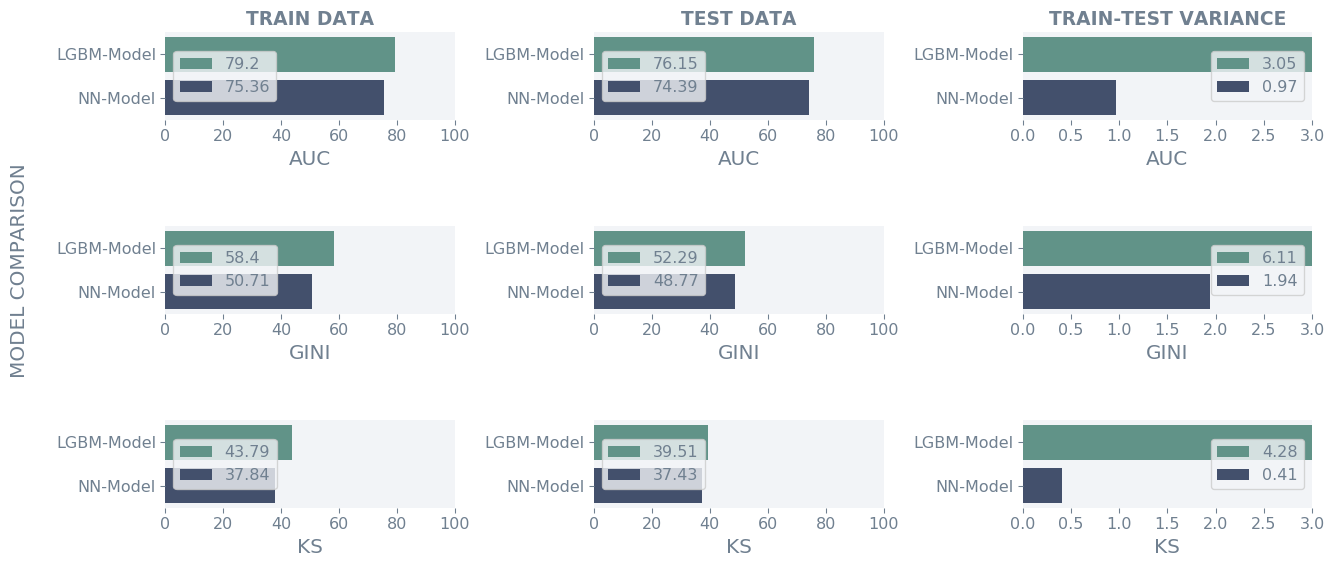

In [345]:
# Plotting all metrics
fig, ((axs1,axs4, axs7), (axs2,axs5, axs8), (axs3,axs6, axs9)) = plt.subplots(3,3, figsize=(14, 6),dpi=96, edgecolor='k', sharex=False, sharey=False)

sns.set_palette(colorset3)

# PLOT SET 1 - train
train_metrics_df = metrics_auc_gini_ks_var_df[metrics_auc_gini_ks_var_df['TRAIN_TEST']=='Train']
#--------
train_metrics_df.sort_values('AUC',ascending=False, inplace=True)
g1 = sns.barplot(x='AUC', y='MODEL', data=train_metrics_df, hue='AUC', dodge=False, ax=axs1)
g1.set_xlabel('AUC')
g1.set_ylabel('')
g1.set(xlim=(0, 100))
handles, labels = g1.get_legend_handles_labels()
g1.legend(reversed(handles), reversed(labels), loc='center left')  # reverse to keep order consistent
#g1.legend(loc='center left')
#--------
train_metrics_df.sort_values('GINI',ascending=False, inplace=True)
g2 = sns.barplot(x='GINI', y='MODEL', data=train_metrics_df,  hue='GINI', dodge=False, ax=axs2)
g2.set_xlabel('GINI')
g2.set_ylabel('')
g2.set(xlim=(0, 100))
handles, labels = g2.get_legend_handles_labels()
g2.legend(reversed(handles), reversed(labels), loc='center left')  # reverse to keep order consistent
#--------
train_metrics_df.sort_values('KS',ascending=False, inplace=True)
g3 = sns.barplot(x='KS', y='MODEL', data=train_metrics_df, hue='KS', dodge=False, ax=axs3)
g3.set_xlabel('KS')
g3.set_ylabel('')
g3.set(xlim=(0, 100))
handles, labels = g3.get_legend_handles_labels()
g3.legend(reversed(handles), reversed(labels), loc='center left')  # reverse to keep order consistent


# PLOT SET 2 - test
test_metrics_df = metrics_auc_gini_ks_var_df[metrics_auc_gini_ks_var_df['TRAIN_TEST']=='Test']
#--------
test_metrics_df.sort_values('AUC',ascending=False, inplace=True)
g4 = sns.barplot(x='AUC', y='MODEL', data=test_metrics_df, hue='AUC', dodge=False, ax=axs4)
g4.set_xlabel('AUC')
g4.set_ylabel('')
g4.set(xlim=(0, 100))
g4.legend(loc='center left')
handles, labels = g4.get_legend_handles_labels()
g4.legend(reversed(handles), reversed(labels), loc='center left')  # reverse to keep order consistent
#--------
test_metrics_df.sort_values('GINI',ascending=False, inplace=True)
g5 = sns.barplot(x='GINI', y='MODEL', data=test_metrics_df, hue='GINI', dodge=False, ax=axs5)
g5.set_xlabel('GINI')
g5.set_ylabel('')
g5.set(xlim=(0, 100))
handles, labels = g5.get_legend_handles_labels()
g5.legend(reversed(handles), reversed(labels), loc='center left')  # reverse to keep order consistent
#--------
test_metrics_df.sort_values('KS',ascending=False, inplace=True)
g6 = sns.barplot(x='KS', y='MODEL', data=test_metrics_df, hue='KS', dodge=False, ax=axs6)
g6.set_xlabel('KS')
g6.set(xlim=(0, 100))
g6.set_ylabel('')
handles, labels = g6.get_legend_handles_labels()
g6.legend(reversed(handles), reversed(labels), loc='center left')  # reverse to keep order consistent


# PLOT SET 3 - variance
variance_metrics_df = metrics_auc_gini_ks_var_df[metrics_auc_gini_ks_var_df['TRAIN_TEST']=='Variance']
#--------
variance_metrics_df.sort_values('AUC',ascending=False, inplace=True)
g7 = sns.barplot(x='AUC', y='MODEL', data=variance_metrics_df, hue='AUC', dodge=False, ax=axs7)
g7.set_xlabel('AUC')
g7.set_ylabel('')
g7.set(xlim=(0, 3))
handles, labels = g7.get_legend_handles_labels()
g7.legend(reversed(handles), reversed(labels), loc='center right')  # reverse to keep order consistent
#--------
variance_metrics_df.sort_values('GINI',ascending=False, inplace=True)
g8 = sns.barplot(x='GINI', y='MODEL', data=variance_metrics_df, hue='GINI', dodge=False, ax=axs8)
g8.set_xlabel('GINI')
g8.set_ylabel('')
g8.set(xlim=(0, 3))
handles, labels = g8.get_legend_handles_labels()
g8.legend(reversed(handles), reversed(labels), loc='center right')  # reverse to keep order consistent
#--------
variance_metrics_df.sort_values('KS',ascending=False, inplace=True)
g9 = sns.barplot(x='KS', y='MODEL', data=variance_metrics_df, hue='KS', dodge=False, ax=axs9)
g9.set_xlabel('KS')
g9.set(xlim=(0, 3))
g9.set_ylabel('')
handles, labels = g9.get_legend_handles_labels()
g9.legend(reversed(handles), reversed(labels), loc='center right')  # reverse to keep order consistent

# PLOT SET 3 - variance
# fig.suptitle('{}\n{}\n{}'.format('Model Comparisons', model_name,''),
#              weight='bold',
#              fontsize=16)

g1.set_title('TRAIN DATA',
             weight='bold',
             fontsize=14)
g4.set_title('TEST DATA',
             weight='bold',
             fontsize=14)
g7.set_title('TRAIN-TEST VARIANCE',
             weight='bold',
             fontsize=14)
axs2.set_ylabel('MODEL COMPARISON\n')


plt.tight_layout()
plt.show()


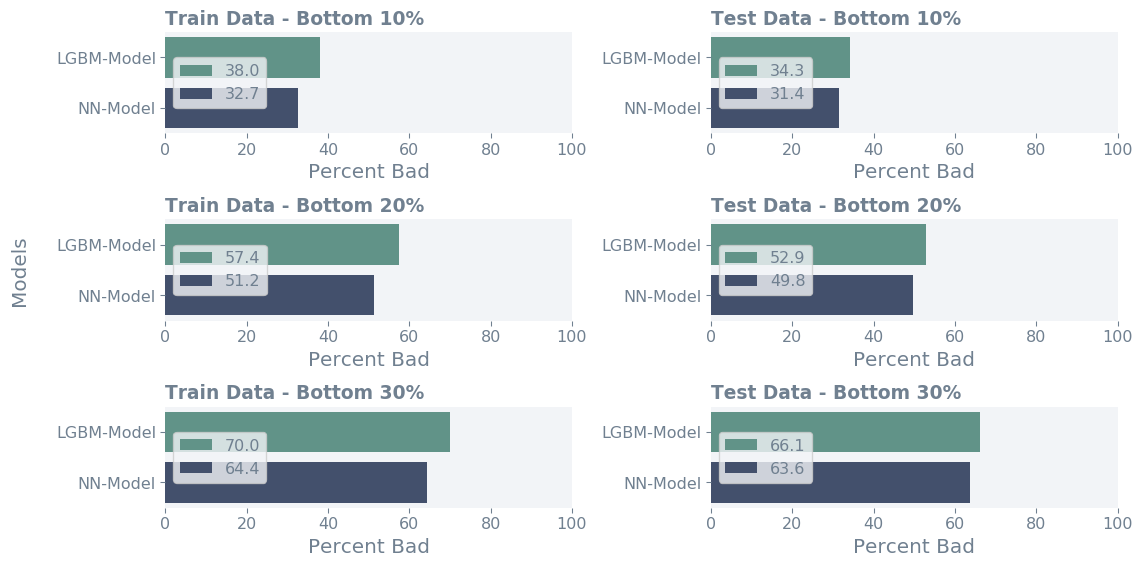

In [346]:
# Plotting bottom 10-20-30 Percent Bads
fig, ((axs1,axs4), (axs2,axs5),(axs3,axs6)) = plt.subplots(3,2, figsize=(12, 6),dpi=96, edgecolor='k', sharex=False, sharey=False)

sns.set_palette(colorset3)
# PLOT SET 1 - train
train_metrics_df = round(bottom_302010[bottom_302010['TRAIN_TEST']=='Train'],1)
#--------
train_metrics_df.sort_values('10_PER',ascending=False, inplace=True)
g1 = sns.barplot(x='10_PER', y='MODEL', data=train_metrics_df,  hue='10_PER', dodge=False, ax=axs1)
g1.set_xlabel('Percent Bad')
g1.set_ylabel('')
g1.set(xlim=(0, 100))
handles, labels = g1.get_legend_handles_labels()
g1.legend(reversed(handles), reversed(labels), loc='center left')  # reverse to keep order consistent
#--------
train_metrics_df.sort_values('20_PER',ascending=False, inplace=True)
g2 = sns.barplot(x='20_PER', y='MODEL', data=train_metrics_df,  hue='20_PER', dodge=False, ax=axs2)
g2.set_xlabel('Percent Bad')
g2.set_ylabel('')
g2.set(xlim=(0, 100))
handles, labels = g2.get_legend_handles_labels()
g2.legend(reversed(handles), reversed(labels), loc='center left')  # reverse to keep order consistent
#--------
train_metrics_df.sort_values('30_PER',ascending=False, inplace=True)
g3 = sns.barplot(x='30_PER', y='MODEL', data=train_metrics_df, hue='30_PER', dodge=False, ax=axs3)
g3.set_xlabel('Percent Bad')
g3.set_ylabel('')
g3.set(xlim=(0, 100))
handles, labels = g3.get_legend_handles_labels()
g3.legend(reversed(handles), reversed(labels), loc='center left')  # reverse to keep order consistent


# PLOT SET 2 - test
test_metrics_df = round(bottom_302010[bottom_302010['TRAIN_TEST']=='Test'],1)
#--------
test_metrics_df.sort_values('10_PER',ascending=False, inplace=True)
g4 = sns.barplot(x='10_PER', y='MODEL', data=test_metrics_df,  hue='10_PER', dodge=False, ax=axs4)
g4.set_xlabel('Percent Bad')
g4.set_ylabel('')
g4.set(xlim=(0, 100))
g4.legend(loc='center left')
handles, labels = g4.get_legend_handles_labels()
g4.legend(reversed(handles), reversed(labels), loc='center left')  # reverse to keep order consistent
#--------
test_metrics_df.sort_values('20_PER',ascending=False, inplace=True)
g5 = sns.barplot(x='20_PER', y='MODEL', data=test_metrics_df,  hue='20_PER', dodge=False, ax=axs5)
g5.set_xlabel('Percent Bad')
g5.set_ylabel('')
g5.set(xlim=(0, 100))
handles, labels = g5.get_legend_handles_labels()
g5.legend(reversed(handles), reversed(labels), loc='center left')  # reverse to keep order consistent
#--------
test_metrics_df.sort_values('30_PER',ascending=False, inplace=True)
g6 = sns.barplot(x='30_PER', y='MODEL', data=test_metrics_df,  hue='30_PER', dodge=False, ax=axs6)
g6.set_xlabel('Percent Bad')
g6.set(xlim=(0, 100))
g6.set_ylabel('')
handles, labels = g6.get_legend_handles_labels()
g6.legend(reversed(handles), reversed(labels), loc='center left')  # reverse to keep order consistent

g1.set_title('Train Data - Bottom 10%', loc='left', weight='bold', fontsize=14)
g2.set_title('Train Data - Bottom 20%', loc='left', weight='bold', fontsize=14)
g3.set_title('Train Data - Bottom 30%', loc='left', weight='bold', fontsize=14)
g4.set_title('Test Data - Bottom 10%', loc='left', weight='bold', fontsize=14)
g5.set_title('Test Data - Bottom 20%', loc='left', weight='bold', fontsize=14)
g6.set_title('Test Data - Bottom 30%', loc='left', weight='bold', fontsize=14)

#PLOT SET 3 - variance
# plt.set_title('{}\n{}\n{}'.format('Model Comparisons', model_name,''),
#              weight='bold',
#              fontsize=16)

# g1.set_title('TRAIN DATA \n',
#              weight='bold',
#              fontsize=14)
# g4.set_title('TEST DATA \n',
#              weight='bold',
#              fontsize=14)

axs2.set_ylabel('Models\n')

plt.tight_layout()
plt.show()
 

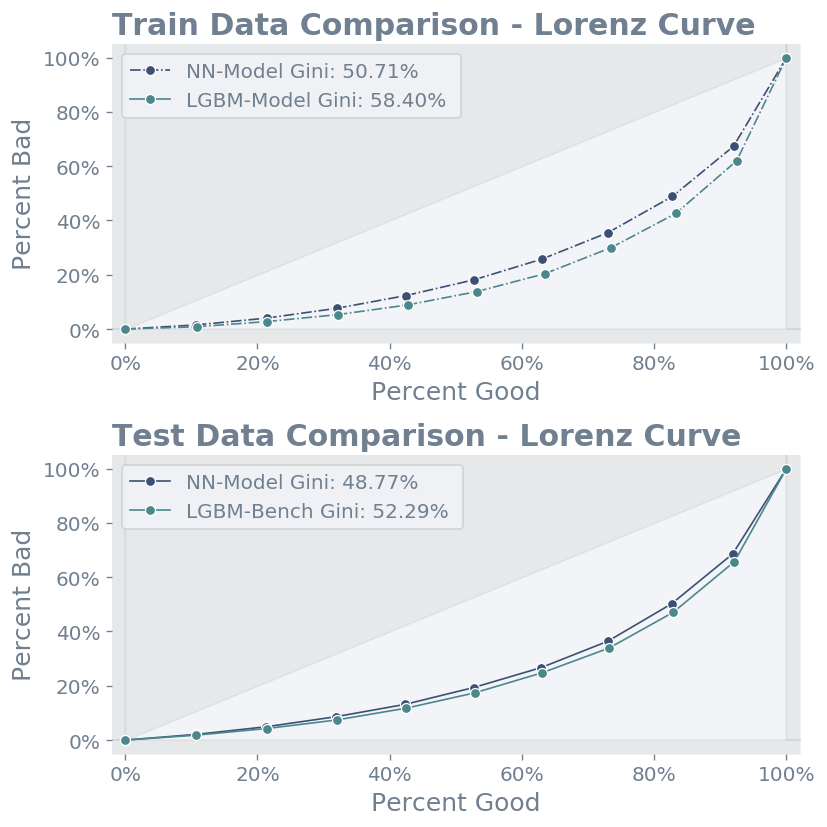

In [241]:
# PLOTTING THE GINI
# Gini coefficient is very similar to CAP but it shows proportion (cumulative) of good customers instead of all customers. 
# It shows the extent to which the model has better classification capabilities in comparison to the random model. 
# The Lorenz also has a diagonal line, which is equivalent to the ‘CAP random model’ line and is called “the Line of Equality”

sns.set_palette('RdPu_r')
fig, ((axs1, axs2)) = plt.subplots(2,
                                                1,
                                                 figsize=(7,7),
                                                 sharex=False,
                                                 sharey=False)

#--------
# Train plots
#--------
g1 = sns.lineplot(data=plotting_model_train,
                  x='GOOD_PCT_CUM',
                  y='BAD_PCT_CUM',
                  label='NN-Model Gini: {:.2%} '.format(model_train_gini),
                  color=color2,
                  dashes=True,
                  marker='o',
                  ax=axs1)

axs1.lines[0].set_linestyle("-.")
#--------
g2 = sns.lineplot(data=plotting_bk_bench_train,
                  x='GOOD_PCT_CUM',
                  y='BAD_PCT_CUM',
                  label='LGBM-Model Gini: {:.2%} '.format(bk_bench_train_gini),
                  color=color3,
                  marker='o',
                  ax=axs1)

axs1.lines[1].set_linestyle("-.")
#--------
# g3 = sns.lineplot(data=plotting_pv3_bench_train,
#                   x='GOOD_PCT_CUM',
#                   y='BAD_PCT_CUM',
#                   label='PV3-Bench Gini: {:.2%} '.format(pv3_bench_train_gini),
#                   color=color4,
#                   marker='o',
#                   ax=axs1)

# axs1.lines[2].set_linestyle("-.")
#--------
# Test plots
#--------
g4 = sns.lineplot(data=plotting_model_test,
                  x='GOOD_PCT_CUM',
                  y='BAD_PCT_CUM',
                  label='NN-Model Gini: {:.2%} '.format(model_test_gini),
                  color=color2,
                  dashes=True,
                  marker='o',
                  ax=axs2)

#--------
g5 = sns.lineplot(data=plotting_bk_bench_test,
                  x='GOOD_PCT_CUM',
                  y='BAD_PCT_CUM',
                  label='LGBM-Bench Gini: {:.2%} '.format(bk_bench_test_gini),
                  color=color3,
                  marker='o',
                  ax=axs2)

# #--------
# g6 = sns.lineplot(data=plotting_pv3_bench_test,
#                   x='GOOD_PCT_CUM',
#                   y='BAD_PCT_CUM',
#                   label='PV3-Bench: {:.2%} '.format(pv3_bench_test_gini),
#                   color=color4,
#                   marker='o',
#                   ax=axs2)

#--------

# PLOTTING MIDLINE PLOT
# # LINE OF EQUALITY
# axs1.plot([0, 100], [0, 100], color='white', linestyle='-', alpha=.4)
# axs1.plot([0, 100], [0, 100], color='grey', linestyle='--', alpha=0.2)
# axs1.plot([0, 100], [0, 0], color='grey', linestyle='--', alpha=0.4)
# axs1.plot([100, 100], [0, 100], color='grey', linestyle='--', alpha=0.4)

# axs2.plot([0, 100], [0, 100], color='white', linestyle='-', alpha=.4)
# axs2.plot([0, 100], [0, 100], color='grey', linestyle='--', alpha=0.2)
# axs2.plot([0, 100], [0, 0], color='grey', linestyle='--', alpha=0.4)
# axs2.plot([100, 100], [0, 100], color='grey', linestyle='--', alpha=0.4)

axs1.fill_between([-10, 0], [0, 0], y2=110, color='grey', alpha=0.1)
axs1.fill_between([0, 100], [0, 100], y2=110, color='grey', alpha=0.1)
axs1.fill_between([100, 110], [0, 0], y2=110, color='grey', alpha=0.1)
axs1.fill_between([-10, 110], [-10, -10], color='grey', alpha=0.1)

axs2.fill_between([-10, 0], [0, 0], y2=110, color='grey', alpha=0.1)
axs2.fill_between([0, 100], [0, 100], y2=110, color='grey', alpha=0.1)
axs2.fill_between([100, 110], [0, 0], y2=110, color='grey', alpha=0.1)
axs2.fill_between([-10, 110], [-10, -10], color='grey', alpha=0.1)




# #plt.xticks(np.arange(0, 101, step=10.0))
axs1.xaxis.set_major_formatter(mtick.PercentFormatter(100.0))
axs2.xaxis.set_major_formatter(mtick.PercentFormatter(100.0))

axs1.yaxis.set_major_formatter(mtick.PercentFormatter(100.0))
axs2.yaxis.set_major_formatter(mtick.PercentFormatter(100.0))

axs1.set_title('Train Data Comparison - Lorenz Curve', loc='left', weight='bold', fontsize=18)
axs2.set_title('Test Data Comparison - Lorenz Curve', loc='left', weight='bold', fontsize=18)

axs1.set_xlabel('Percent Good')
axs1.set_ylabel('Percent Bad')

axs2.set_xlabel('Percent Good')
axs2.set_ylabel('Percent Bad')

axs1.set_ylim([-5,105])
axs2.set_ylim([-5,105])

axs1.set_xlim([-2,102])
axs2.set_xlim([-2,102])

plt.tight_layout()
plt.show()

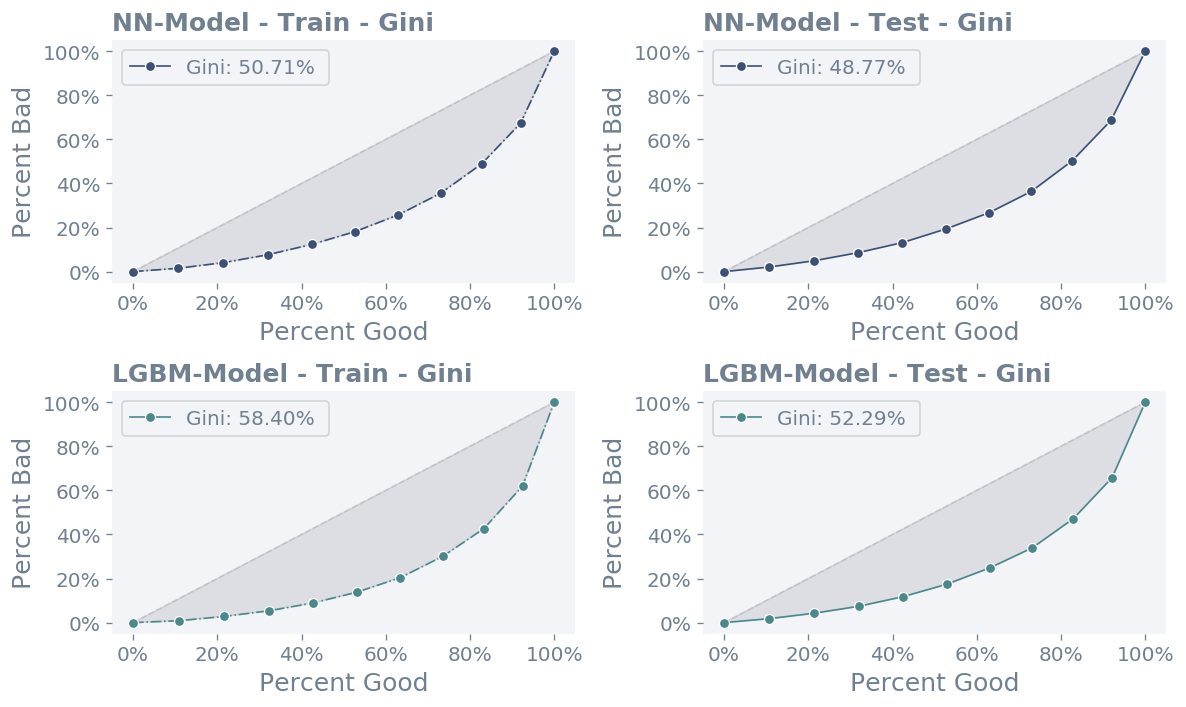

In [242]:
# PLOTTING THE GINI
# Gini coefficient is very similar to CAP but it shows proportion (cumulative) of good customers instead of all customers. 
# It shows the extent to which the model has better classification capabilities in comparison to the random model. 
# The Lorenz also has a diagonal line, which is equivalent to the ‘CAP random model’ line and is called “the Line of Equality”

sns.set_palette('RdPu_r')
fig, ((axs1, axs4), (axs2, axs5)) = plt.subplots(2,
                                                 2,
                                                 figsize=(10,6),
                                                 sharex=False,
                                                 sharey=False)

#--------
# Train plots
#--------
g1 = sns.lineplot(data=plotting_model_train,
                  x='GOOD_PCT_CUM',
                  y='BAD_PCT_CUM',
                  label='Gini: {:.2%} '.format(model_train_gini),
                  color=color2,
                  dashes=True,
                  marker='o',
                  ax=axs1)
xplot = np.array(plotting_model_train['GOOD_PCT_CUM'])
yplot = (np.array(plotting_model_train['BAD_PCT_CUM']))
g1.fill(xplot, yplot, color=color1, alpha=0.1)
g1.set_xlabel('Percent Good')
g1.set_ylabel('Percent Bad')
axs1.lines[0].set_linestyle("-.")
#--------
g2 = sns.lineplot(data=plotting_bk_bench_train,
                  x='GOOD_PCT_CUM',
                  y='BAD_PCT_CUM',
                  label='Gini: {:.2%} '.format(bk_bench_train_gini),
                  color=color3,
                  marker='o',
                  ax=axs2)
xplot = np.array(plotting_bk_bench_train['GOOD_PCT_CUM'])
yplot = (np.array(plotting_bk_bench_train['BAD_PCT_CUM']))
g2.fill(xplot, yplot, color=color1, alpha=0.1)
g2.set_xlabel('Percent Good')
g2.set_ylabel('Percent Bad')
axs2.lines[0].set_linestyle("-.")
#--------
# g3 = sns.lineplot(data=plotting_pv3_bench_train,
#                   x='GOOD_PCT_CUM',
#                   y='BAD_PCT_CUM',
#                   label='Gini: {:.2%} '.format(pv3_bench_train_gini),
#                   color=color4,
#                   marker='o',
#                   ax=axs3)
# xplot = np.array(plotting_pv3_bench_train['GOOD_PCT_CUM'])
# yplot = (np.array(plotting_pv3_bench_train['BAD_PCT_CUM']))
# g3.fill(xplot, yplot, color=color1, alpha=0.1)
# g3.set_xlabel('Percent Good')
# g3.set_ylabel('Percent Bad')
# axs3.lines[0].set_linestyle("-.")
#--------
# Test plots
#--------
g4 = sns.lineplot(data=plotting_model_test,
                  x='GOOD_PCT_CUM',
                  y='BAD_PCT_CUM',
                  label='Gini: {:.2%} '.format(model_test_gini),
                  color=color2,
                  dashes=True,
                  marker='o',
                  ax=axs4)
xplot = np.array(plotting_model_test['GOOD_PCT_CUM'])
yplot = (np.array(plotting_model_test['BAD_PCT_CUM']))
g4.fill(xplot, yplot, color=color1, alpha=0.1)
g4.set_xlabel('Percent Good')
g4.set_ylabel('Percent Bad')
#--------
g5 = sns.lineplot(data=plotting_bk_bench_test,
                  x='GOOD_PCT_CUM',
                  y='BAD_PCT_CUM',
                  label='Gini: {:.2%} '.format(bk_bench_test_gini),
                  color=color3,
                  marker='o',
                  ax=axs5)
xplot = np.array(plotting_bk_bench_test['GOOD_PCT_CUM'])
yplot = (np.array(plotting_bk_bench_test['BAD_PCT_CUM']))
g5.fill(xplot, yplot, color=color1, alpha=0.1)
g5.set_xlabel('Percent Good')
g5.set_ylabel('Percent Bad')
#--------
# g6 = sns.lineplot(data=plotting_pv3_bench_test,
#                   x='GOOD_PCT_CUM',
#                   y='BAD_PCT_CUM',
#                   label='Gini: {:.2%} '.format(pv3_bench_test_gini),
#                   color=color4,
#                   marker='o',
#                   ax=axs6)
# xplot = np.array(plotting_pv3_bench_test['GOOD_PCT_CUM'])
# yplot = (np.array(plotting_pv3_bench_test['BAD_PCT_CUM']))
# g6.fill(xplot, yplot, color=color1, alpha=0.1)
# g6.set_xlabel('Percent Good')
# g6.set_ylabel('Percent Bad')
#--------

# PLOTTING MIDLINE PLOT
# # LINE OF EQUALITY
g1.plot([0, 100], [0, 100], color='grey', linestyle='--', alpha=0.2)
g2.plot([0, 100], [0, 100], color='grey', linestyle='--', alpha=0.2)
# g3.plot([0, 100], [0, 100], color='grey', linestyle='--', alpha=0.2)
g4.plot([0, 100], [0, 100], color='grey', linestyle='--', alpha=0.2)
g5.plot([0, 100], [0, 100], color='grey', linestyle='--', alpha=0.2)
# g6.plot([0, 100], [0, 100], color='grey', linestyle='--', alpha=0.2)

#plt.xticks(np.arange(0, 101, step=10.0))
axs1.xaxis.set_major_formatter(mtick.PercentFormatter(100.0))
axs2.xaxis.set_major_formatter(mtick.PercentFormatter(100.0))
# axs3.xaxis.set_major_formatter(mtick.PercentFormatter(100.0))
axs4.xaxis.set_major_formatter(mtick.PercentFormatter(100.0))
axs5.xaxis.set_major_formatter(mtick.PercentFormatter(100.0))
# axs6.xaxis.set_major_formatter(mtick.PercentFormatter(100.0))


axs1.yaxis.set_major_formatter(mtick.PercentFormatter(100.0))
axs2.yaxis.set_major_formatter(mtick.PercentFormatter(100.0))
# axs3.yaxis.set_major_formatter(mtick.PercentFormatter(100.0))
axs4.yaxis.set_major_formatter(mtick.PercentFormatter(100.0))
axs5.yaxis.set_major_formatter(mtick.PercentFormatter(100.0))
# axs6.yaxis.set_major_formatter(mtick.PercentFormatter(100.0))


g1.set_title('NN-Model - Train - Gini', loc='left', weight='bold', fontsize=15)
g2.set_title('LGBM-Model - Train - Gini', loc='left', weight='bold', fontsize=15)
# g3.set_title('PV3-Bench - Train - Gini', loc='left', weight='bold', fontsize=15)
g4.set_title('NN-Model - Test - Gini', loc='left', weight='bold', fontsize=15)
g5.set_title('LGBM-Model - Test - Gini', loc='left', weight='bold', fontsize=15)
# g6.set_title('PV3-Bench - Test - Gini', loc='left', weight='bold', fontsize=15)

plt.tight_layout()
plt.show()

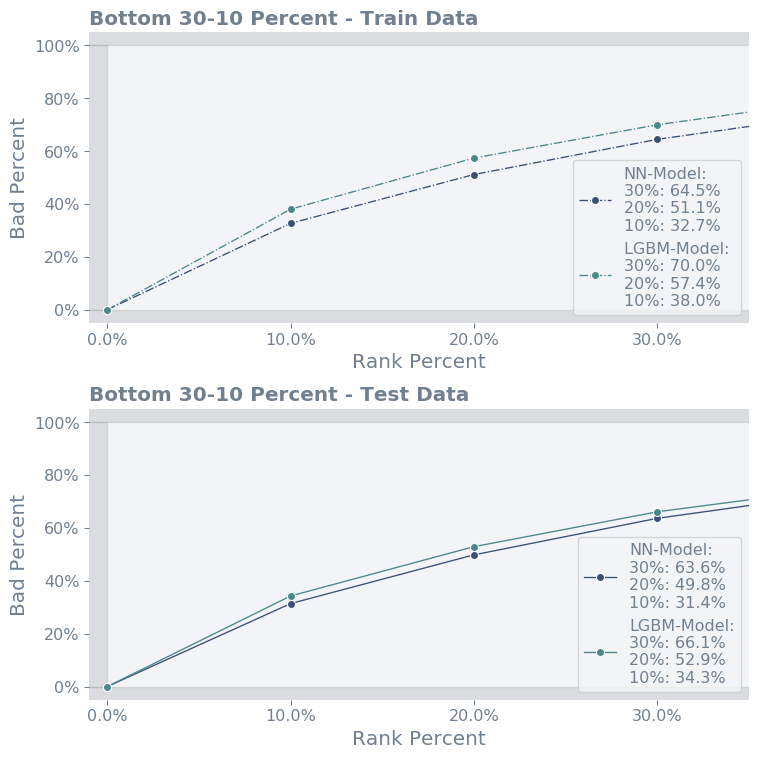

In [243]:
# PLOTTING PERCENT BAD 10-20-30
#sns.set_palette('RdPu_r')
fig, (axs1, axs2) = plt.subplots(2, 1, sharex=False, figsize=(8,8), dpi=96)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=1.10)

#-----
val_70  = 14
model_train_70 = round(float(plotting_model_train.loc[val_70, ['GAIN_CAP']]),1)
model_test_70 = round(float(plotting_model_test.loc[val_70, ['GAIN_CAP']]), 1)
bk_bench_train_70 = round(
    float(plotting_bk_bench_train.loc[val_70, ['GAIN_CAP']]), 1)
bk_bench_test_70 = round(
    float(plotting_bk_bench_test.loc[val_70, ['GAIN_CAP']]), 1)
# pv3_bench_train_70 = round(
#     float(plotting_pv3_bench_train.loc[val_70, ['GAIN_CAP']]), 1)
# pv3_bench_test_70 = round(
#     float(plotting_pv3_bench_test.loc[val_70, ['GAIN_CAP']]), 1)
#-----
val_80  = 16
model_train_80 = round(float(plotting_model_train.loc[val_80, ['GAIN_CAP']]),1)
model_test_80 = round(float(plotting_model_test.loc[val_80, ['GAIN_CAP']]), 1)
bk_bench_train_80 = round(
    float(plotting_bk_bench_train.loc[val_80, ['GAIN_CAP']]), 1)
bk_bench_test_80 = round(
    float(plotting_bk_bench_test.loc[val_80, ['GAIN_CAP']]), 1)
# pv3_bench_train_80 = round(
#     float(plotting_pv3_bench_train.loc[val_80, ['GAIN_CAP']]), 1)
# pv3_bench_test_80 = round(
#     float(plotting_pv3_bench_test.loc[val_80, ['GAIN_CAP']]), 1)
#-----
val_90  = 18
model_train_90 = round(float(plotting_model_train.loc[val_90, ['GAIN_CAP']]),1)
model_test_90 = round(float(plotting_model_test.loc[val_90, ['GAIN_CAP']]), 1)
bk_bench_train_90 = round(
    float(plotting_bk_bench_train.loc[val_90, ['GAIN_CAP']]), 1)
bk_bench_test_90 = round(
    float(plotting_bk_bench_test.loc[val_90, ['GAIN_CAP']]), 1)
# pv3_bench_train_90 = round(
#     float(plotting_pv3_bench_train.loc[val_90, ['GAIN_CAP']]), 1)
# pv3_bench_test_90 = round(
#     float(plotting_pv3_bench_test.loc[val_90, ['GAIN_CAP']]), 1)
#-----

#-----
# MAIN PLOTS
# plot
g1 = sns.lineplot(data=plotting_model_train,
                  x='RANK_PCT_REV',
                  y='GAIN_CAP',
                  marker='o',
                  label='NN-Model:\n30%: {}% \n20%: {}% \n10%: {}%'.format(
                      model_train_70, model_train_80, model_train_90),
                  color=color2,
                  dashes=True,
                  ax=axs1)
g1.lines[0].set_linestyle("-.")
#-----
# plot
g2 = sns.lineplot(data=plotting_model_test,
                  x='RANK_PCT_REV',
                  y='GAIN_CAP',
                  marker='o',
                  label='NN-Model:\n30%: {}% \n20%: {}% \n10%: {}%'.format(
                      model_test_70, model_test_80, model_test_90),
                  color=color2,
                  ax=axs2)
#-----
# plot
g3 = sns.lineplot(data=plotting_bk_bench_train,
                  x='RANK_PCT_REV',
                  y='GAIN_CAP',
                  marker='o',
                  color=color3,
                  label='LGBM-Model: \n30%: {}% \n20%: {}% \n10%: {}%'.format(
                      bk_bench_train_70, bk_bench_train_80,bk_bench_train_90),
                  ax=axs1)
g3.lines[1].set_linestyle("-.")
#-----
# plot
g4 = sns.lineplot(data=plotting_bk_bench_test,
                  x='RANK_PCT_REV',
                  y='GAIN_CAP',
                  marker='o',
                  color=color3,
                  label='LGBM-Model:\n30%: {}% \n20%: {}% \n10%: {}%'.format(
                      bk_bench_test_70, bk_bench_test_80, bk_bench_test_90),
                  ax=axs2)
#-----
# plot
# g5 = sns.lineplot(data=plotting_pv3_bench_train,
#                   x='RANK_PCT_REV',
#                   y='GAIN_CAP',
#                   marker='o',
#                   color=color4,
#                   label='PV3-Bench:\n30%: {}% \n20%: {}% \n10%: {}%'.format(
#                       pv3_bench_train_70, pv3_bench_train_80,pv3_bench_train_90),
#                   ax=axs1)
# g5.lines[2].set_linestyle("-.")
#-----
# plot
# g6 = sns.lineplot(data=plotting_pv3_bench_test,
#                   x='RANK_PCT_REV',
#                   y='GAIN_CAP',
#                   marker='o',
#                   color=color4,
#                   label='PV3-Bench:\n30%: {}% \n20%: {}% \n10%: {}%'.format(
#                       pv3_bench_test_70, pv3_bench_test_80, pv3_bench_test_90),
#                   ax=axs2)


#-----
axs1.fill_between([-10, 110], [100, 100],y2=110, color='grey', alpha=0.2)
axs1.fill_between([-10, 0], [0, 0], y2=100, color='grey', alpha=0.2)
axs1.fill_between([-10, 110], [-10, -10], color='grey', alpha=0.2)
#-----
axs2.fill_between([-10, 110], [100, 100],y2=110, color='grey', alpha=0.2)
axs2.fill_between([-10, 0], [0, 0], y2=100, color='grey', alpha=0.2)
axs2.fill_between([-10, 110], [-10, -10], color='grey', alpha=0.2)
#-----

axs1.set_ylabel('Bad Percent')
axs2.set_ylabel('Bad Percent')
axs1.set_xlabel('Rank Percent')
axs2.set_xlabel('Rank Percent')
('Reverse Rank Order Percent')

#-----
#plt.xticks(np.arange(0, 101, step=10.0))
axs1.xaxis.set_major_locator(MultipleLocator(10))
axs1.xaxis.set_major_formatter(mtick.PercentFormatter(100.0))
axs2.xaxis.set_major_locator(MultipleLocator(10))
axs2.xaxis.set_major_formatter(mtick.PercentFormatter(100.0))
axs1.yaxis.set_major_formatter(mtick.PercentFormatter(100.0))
axs2.yaxis.set_major_formatter(mtick.PercentFormatter(100.0))
#-----

g1.set_title('Bottom 30-10 Percent - Train Data', loc='left', weight='bold', fontsize=15)
g2.set_title('Bottom 30-10 Percent - Test Data', loc='left', weight='bold', fontsize=15)
#-----
# axs1.invert_xaxis()
# axs2.invert_xaxis()
axs1.set_xlim([-1,35])
axs2.set_xlim([-1,35])
axs1.set_ylim([-5,105])
axs2.set_ylim([-5,105])
#-----

axs1.legend(loc='lower right')
axs2.legend(loc='lower right')
#-----
plt.tight_layout()
plt.show()

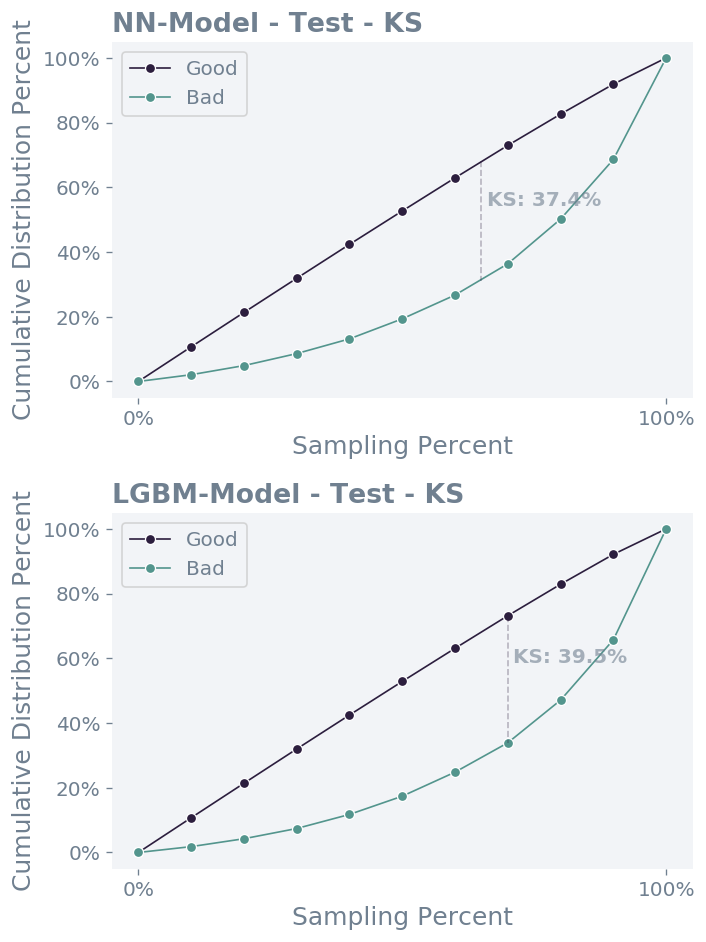

In [244]:
# Bad Capture in the Bottom 30%

sns.set_palette(colorset3)
fig, (axs1,axs2) = plt.subplots(2,1,sharex=False,figsize=(6,8),sharey=False)


#____________________
g1 = sns.lineplot(data=plotting_model_test,
                  x='RANK_PCT',
                  y='GOOD_PCT_CUM',
                  marker='o',
                  label='Good',
                  ax=axs1)
g1 = sns.lineplot(data=plotting_model_test,
                  x='RANK_PCT',
                  y='BAD_PCT_CUM',
                  marker='o',
                  label='Bad',
                  ax=axs1)

goodvar = float(rank_order_nn_test.loc[rank_order_nn_test['KS'] ==
                                         'KS', 'GOOD_PCT_CUM'])
badvar = float(rank_order_nn_test.loc[rank_order_nn_test['KS'] ==
                                        'KS', 'BAD_PCT_CUM'])
rankpctvar = float(
    rank_order_nn_test.loc[rank_order_nn_test['KS'] == 'KS', 'RANK_PCT'])
rankpctvar = rankpctvar
g1.plot([rankpctvar, rankpctvar], [goodvar, badvar],
        color=color1,
        linestyle='--',
        alpha=0.3)
g1.annotate(
    "KS: {:.1%}".format(model_test_ks),
    xy=[0, 0],
    xytext=(rankpctvar + 1, (goodvar + badvar) * 0.5 + 5),
    fontsize=12,
    #verticalalignment = 'center',
    fontweight='bold',
    color='slategrey',
    alpha=0.6)
#____________________
g2 = sns.lineplot(data=plotting_bk_bench_test,
                  x='RANK_PCT',
                  y='GOOD_PCT_CUM',
                  marker='o',
                  label='Good',
                  ax=axs2)
g2 = sns.lineplot(data=plotting_bk_bench_test,
                  x='RANK_PCT',
                  y='BAD_PCT_CUM',
                  marker='o',
                  label='Bad',
                  ax=axs2)

goodvar = float(rank_order_lgbm_test.loc[rank_order_lgbm_test['KS'] ==
                                         'KS', 'GOOD_PCT_CUM'])
badvar = float(rank_order_lgbm_test.loc[rank_order_lgbm_test['KS'] ==
                                        'KS', 'BAD_PCT_CUM'])
rankpctvar = float(
    rank_order_lgbm_test.loc[rank_order_lgbm_test['KS'] == 'KS', 'RANK_PCT'])
rankpctvar = rankpctvar
g2.plot([rankpctvar, rankpctvar], [goodvar, badvar],
        color=color1,
        linestyle='--',
        alpha=0.3)
g2.annotate(
    "KS: {:.1%}".format(bk_bench_test_ks),
    xy=[0, 0],
    xytext=(rankpctvar + 1, (goodvar + badvar) * 0.5 + 5),
    fontsize=12,
    #verticalalignment = 'center',
    fontweight='bold',
    color='slategrey',
    alpha=0.6)
#____________________
# g3 = sns.lineplot(data=plotting_pv3_bench_test,
#                   x='RANK_PCT',
#                   y='GOOD_PCT_CUM',
#                   marker='o',
#                   label='Good',
#                   ax=axs3)
# g3 = sns.lineplot(data=plotting_pv3_bench_test,
#                   x='RANK_PCT',
#                   y='BAD_PCT_CUM',
#                   marker='o',
#                   label='Bad',
#                   ax=axs3)

# goodvar = float(rank_order_pv3_bench_test.loc[rank_order_pv3_bench_test['KS'] ==
#                                          'KS', 'GOOD_PCT_CUM'])
# badvar = float(rank_order_pv3_bench_test.loc[rank_order_pv3_bench_test['KS'] ==
#                                         'KS', 'BAD_PCT_CUM'])
# rankpctvar = float(
#     rank_order_pv3_bench_test.loc[rank_order_pv3_bench_test['KS'] == 'KS', 'RANK_PCT'])
# rankpctvar = rankpctvar
# g3.plot([rankpctvar, rankpctvar], [goodvar, badvar],
#         color=color1,
#         linestyle='--',
#         alpha=0.3)

# g3.annotate(
#     "KS: {:.1%}".format(pv3_bench_test_ks),
#     xy=[0, 0],
#     xytext=(rankpctvar + 1, (goodvar + badvar) * 0.5 + 5),
#     fontsize=12,
#     #verticalalignment = 'center',
#     fontweight='bold',
#     color='slategrey',
#     alpha=0.6)
# #____________________


g1.set_title('NN-Model - Test - KS', loc='left', weight='bold', fontsize=16)
g2.set_title('LGBM-Model - Test - KS', loc='left', weight='bold', fontsize=16)
# g3.set_title('PV3-Bench - Test - KS', loc='left', weight='bold', fontsize=16)


g1.xaxis.set_major_formatter(mtick.PercentFormatter(100.0))
g2.xaxis.set_major_formatter(mtick.PercentFormatter(100.0))
# g3.xaxis.set_major_formatter(mtick.PercentFormatter(100.0))

g1.xaxis.set_major_locator(MultipleLocator(100))
g2.xaxis.set_major_locator(MultipleLocator(100))
# g3.xaxis.set_major_locator(MultipleLocator(100))

g1.yaxis.set_major_formatter(mtick.PercentFormatter(100.0))
g2.yaxis.set_major_formatter(mtick.PercentFormatter(100.0))
# g3.yaxis.set_major_formatter(mtick.PercentFormatter(100.0))


g1.set_xlabel('Sampling Percent')
g2.set_xlabel('Sampling Percent')
# g3.set_xlabel('Sampling Percent')


g1.set_ylabel('Cumulative Distribution Percent')
g2.set_ylabel('Cumulative Distribution Percent')
# g3.set_ylabel('Cumulative Distribution Percent')




plt.tight_layout()

plt.show()

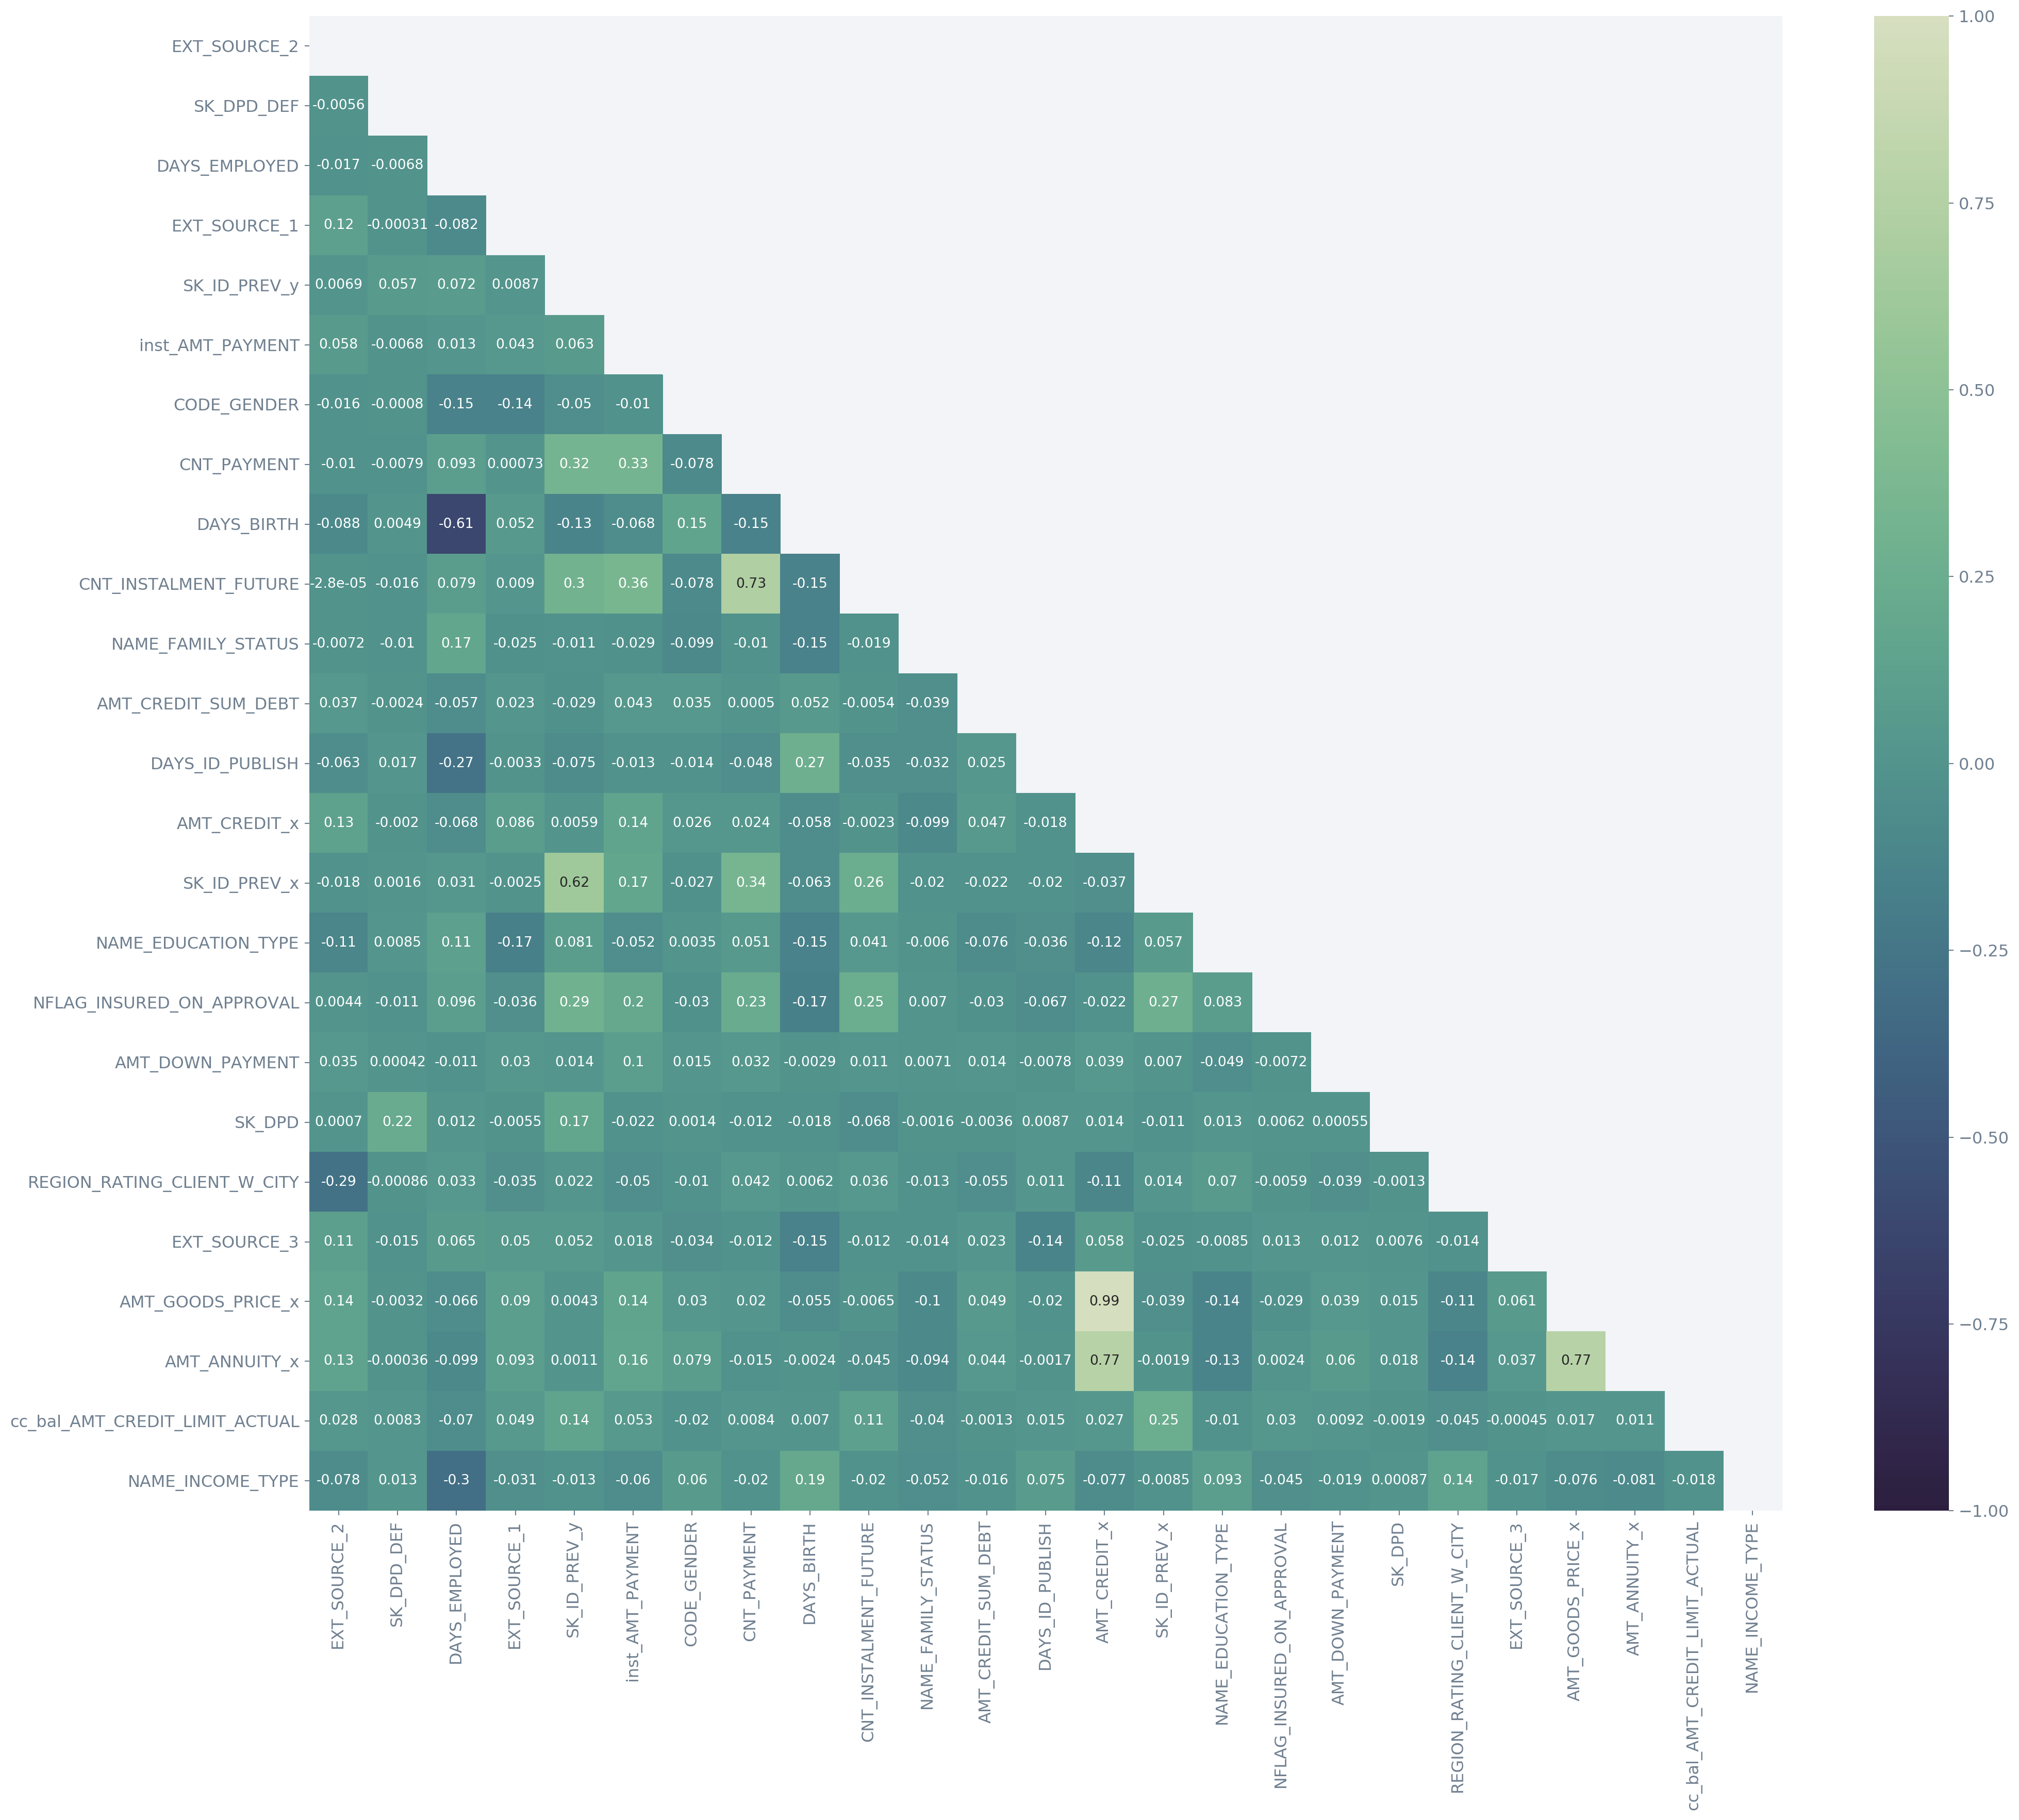

In [245]:
# Correlation Matrix

# correlation plot for monotonics and scoring versus variables
#-----
# CREATE DATAFRAME FROM PROB SCORES
y_test_df = pd.DataFrame(y_val)
y_test_df.reset_index(drop=True, inplace=True)
testprobsdf = pd.DataFrame(y_pred_prob_test_nn,
                               columns=['Score'])
testprobsdf = pd.merge(y_test_df,
                           testprobsdf,
                           left_index=True,
                           right_index=True)
# MERGE X VALUES
x_test_df = pd.DataFrame(X_val)
testprobsdf = testprobsdf.merge(x_test_df,
                           left_index=True,
                           right_index=True)

# SAMPLE SO THE HEATMAP IS QUICKER
testprobsdfsample = testprobsdf.sample(frac=0.25)

# SET VALS TO PLOT IN HEATMAP
#corvals1 = ['Score', 'BKGTag'] + shap_top25_lightgbm
corvals1 =  X_val.columns


# SET VALS FOR COR PLOTTING
df_ext_src_corr = testprobsdfsample.loc[:, corvals1]
df_ext_src_corr

# CREATE MASK TO BLOCK TOP SECTIONS
mask1 = np.zeros_like(df_ext_src_corr.corr(), dtype=np.bool)
mask1[np.triu_indices_from(mask1)] = True

# # CREATE HEATMAP
plt.subplots(figsize=(24, 20), dpi=192)
sns.heatmap(df_ext_src_corr.corr(),vmin=-1.0,vmax=1.0,annot=True, cmap=colormap, mask=mask1)
plt.show()
# #-----


In [ ]:
# Print Correlations
display(pd.DataFrame(df_ext_src_corr.corr()))

## Shapley Feature Importance

In [98]:
 # RUNNING SHAPLEY VALUES
import shap
shap.initjs()
print(shap.__version__)

0.35.0


In [246]:
 # RUNNING SHAPLEY VALUES
explainer_lgbm = shap.TreeExplainer(model_fitted_lgbm)  # Normal Classifier
 
x_importance_lgbm = X_val
shap_values_lgbm = explainer_lgbm.shap_values(x_importance_lgbm)

In [247]:
# Shapley Feature Importance
shap_sum_lgbm = np.abs(shap_values_lgbm).mean(axis=0)
importance_df_lgbm = pd.DataFrame(
    [x_importance_lgbm.columns.tolist(),
     shap_sum_lgbm[0].tolist()]).T

In [248]:
importance_df_lgbm.columns = ['column_name', 'shap_importance']
#importance_df_lgbm.rename(columns={0:'column_name', 1:'shap_importance'})
importance_df_lgbm = importance_df_lgbm.sort_values('shap_importance', ascending=False)

The features below are those we used in the second iterations of the models. 

In [249]:
top25_shap_lgbm_list = list(importance_df_lgbm['column_name'].head(25))
print(top25_shap_lgbm_list)
lgbmtop3 = top25_shap_lgbm_list[0:3]
print(lgbmtop3)

['EXT_SOURCE_2', 'inst_AMT_PAYMENT', 'SK_DPD_DEF', 'DAYS_EMPLOYED', 'SK_ID_PREV_y', 'REGION_RATING_CLIENT_W_CITY', 'CNT_INSTALMENT_FUTURE', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'NAME_FAMILY_STATUS', 'AMT_DOWN_PAYMENT', 'NAME_EDUCATION_TYPE', 'EXT_SOURCE_3', 'DAYS_ID_PUBLISH', 'CODE_GENDER', 'SK_ID_PREV_x', 'SK_DPD', 'AMT_ANNUITY_x', 'AMT_CREDIT_x', 'CNT_PAYMENT', 'AMT_CREDIT_SUM_DEBT', 'AMT_GOODS_PRICE_x', 'NAME_INCOME_TYPE', 'NFLAG_INSURED_ON_APPROVAL', 'cc_bal_AMT_CREDIT_LIMIT_ACTUAL']
['EXT_SOURCE_2', 'inst_AMT_PAYMENT', 'SK_DPD_DEF']


## Feature Importance

Text(0.5, 0, 'Shap Importance')

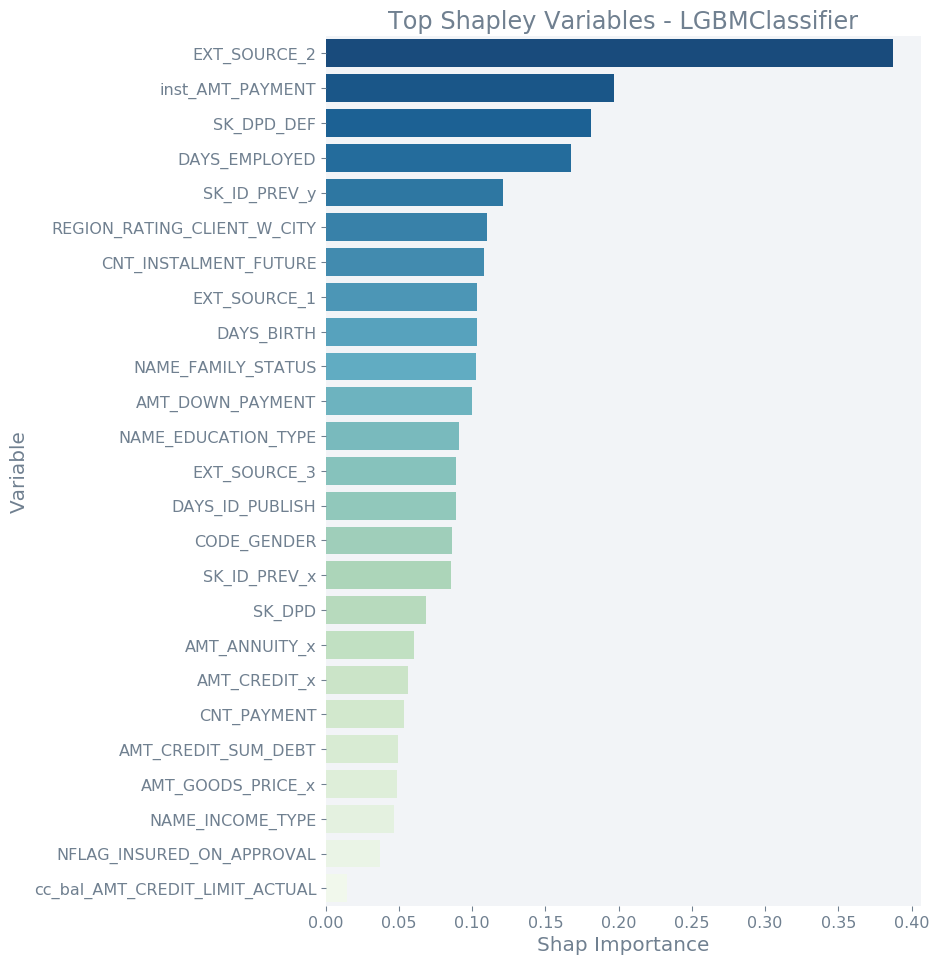

In [287]:
#importance_df.head(25)

plt.figure(figsize=(8,12), dpi=96)
sns.barplot(data=importance_df_lgbm, y='column_name', x='shap_importance', palette='GnBu_r')

plt.title('Top Shapley Variables - {}'.format(model_name))
plt.ylabel('Variable')
plt.xlabel('Shap Importance')